## Retrieving Data and Premilinary Cleaning
Our original data came in the form of parquet files for each month. We used this script repeatedly on 12 months of data (from 2021-12 to 2022-11) to retrieve our raw trip record data.

In [ ]:
import pyarrow.parquet as pq
import pandas as pd
trips_hv = pq.read_table('fhvhv_tripdata_2022-08.parquet')
trips_hv = trips_hv.to_pandas()
# trips_simple = pq.read_table('fhvhv_tripdata_2022-09.parquet')
# trips_simple = trips_simple.to_pandas()

In [ ]:
# TBU: prime key
# Drop na ** only drop prime key -> u select colums but this is very time-consuming
# sample of trips_22_08, ran for all 12 months

trips_22_08 = trips_hv.dropna(subset = ['hvfhs_license_num','PULocationID', 'DOLocationID','trip_time','base_passenger_fare'])
trips_22_08.count()


# row dropped: 17793551 - 0 = 4885287 (0%)

hvfhs_license_num       17185687
dispatching_base_num    17185687
originating_base_num    12506847
request_datetime        17185687
on_scene_datetime       12506893
pickup_datetime         17185687
dropoff_datetime        17185687
PULocationID            17185687
DOLocationID            17185687
trip_miles              17185687
trip_time               17185687
base_passenger_fare     17185687
tolls                   17185687
bcf                     17185687
sales_tax               17185687
congestion_surcharge    17185687
airport_fee             17185687
tips                    17185687
driver_pay              17185687
shared_request_flag     17185687
shared_match_flag       17185687
access_a_ride_flag      17185687
wav_request_flag        17185687
wav_match_flag          17185687
dtype: int64

# Sampling 1%
Since the original data consisted of tens of millions of trips each month, we randomly sampled 1% of trips each month to make our analysis more efficient.

In [ ]:
trips_22_08_sampled = trips_22_08.sample(frac=0.01, random_state = 1)
print(trips_22_08_sampled.count())

hvfhs_license_num       171857
dispatching_base_num    171857
originating_base_num    125054
request_datetime        171857
on_scene_datetime       125054
pickup_datetime         171857
dropoff_datetime        171857
PULocationID            171857
DOLocationID            171857
trip_miles              171857
trip_time               171857
base_passenger_fare     171857
tolls                   171857
bcf                     171857
sales_tax               171857
congestion_surcharge    171857
airport_fee             171857
tips                    171857
driver_pay              171857
shared_request_flag     171857
shared_match_flag       171857
access_a_ride_flag      171857
wav_request_flag        171857
wav_match_flag          171857
dtype: int64


# Nullfill on tips

In [ ]:
trips_22_08_sampled['tips'] = trips_22_08_sampled['tips'].fillna(value=0)

# Variable transformation
1. month
2. locationID >> Borough & service_zone 
3. datetime >> 
4. pickup_day: Day of week for trip: Mon, Tue, Wed, Thu, Fri, Sat, Sun
5. period_of_day: Time of day for pickup: morning (6am-12pm), afternoon(12 pm-6pm), evening(6pm-12am), night(12am-6am)
6. pickup_date: Date of month for pickup
7. period_of_month: Period of month when the trip occurred: beginning(1-10), middle(11-20), end(21-end)
8. pickup_hour: Hour of day for pickup  (24 hour format)


In [ ]:
# 1. month vairable
# pickup_month
trips_22_08_sampled['month'] = trips_22_08_sampled['pickup_datetime'].dt.strftime('%h') # or %m if we want numerical
trips_22_08_sampled.head(10)

# trips_22_09_sampled['month'] = pd.DatetimeIndex(trips_22_09_sampled['pickup_datetime']).month
# trips_22_09_sampled.head(10)


,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,month
3736598,HV0003,B03404,B03404,2022-08-07 14:17:01,2022-08-07 14:18:56,2022-08-07 14:20:56,2022-08-07 14:25:22,35,35,0.620,...,0.00,0.0,0.00,10.56,N,N,,N,N,Aug
11532357,HV0003,B03404,B03404,2022-08-21 14:44:17,2022-08-21 14:50:15,2022-08-21 14:51:00,2022-08-21 15:20:25,177,177,3.240,...,0.00,0.0,0.00,21.92,N,N,,N,N,Aug
16446431,HV0003,B03404,B03404,2022-08-30 16:10:13,2022-08-30 16:13:09,2022-08-30 16:14:23,2022-08-30 16:29:10,237,161,1.360,...,2.75,0.0,5.00,9.41,N,N,,N,N,Aug
14772464,HV0003,B03404,B03404,2022-08-27 15:48:47,2022-08-27 15:52:45,2022-08-27 15:53:25,2022-08-27 15:59:23,150,210,1.160,...,0.00,0.0,0.00,5.40,N,N,,N,N,Aug
13856649,HV0005,B03406,None,2022-08-26 03:38:04,NaT,2022-08-26 03:40:23,2022-08-26 03:47:15,256,79,2.359,...,2.75,0.0,0.00,6.40,N,N,N,N,N,Aug
17118577,HV0003,B03404,B03404,2022-08-31 21:20:32,2022-08-31 21:29:31,2022-08-31 21:30:29,2022-08-31 22:05:47,138,180,11.410,...,0.00,2.5,7.48,36.87,N,N,,N,N,Aug
9654078,HV0003,B03404,B03404,2022-08-18 14:08:11,2022-08-18 14:10:35,2022-08-18 14:11:03,2022-08-18 14:25:24,144,231,1.310,...,2.75,0.0,3.00,9.13,N,N,,N,N,Aug
5651156,HV0003,B03404,B03404,2022-08-11 07:31:31,2022-08-11 07:38:04,2022-08-11 07:38:55,2022-08-11 07:46:16,76,76,1.110,...,0.00,0.0,0.00,9.68,N,N,,N,N,Aug
3720602,HV0005,B03406,None,2022-08-07 14:26:46,NaT,2022-08-07 14:37:13,2022-08-07 14:53:15,186,230,1.224,...,2.75,0.0,3.97,13.72,N,N,N,N,N,Aug
6429275,HV0005,B03406,None,2022-08-12 14:27:54,NaT,2022-08-12 14:31:34,2022-08-12 14:59:48,41,220,6.529,...,0.00,0.0,0.00,24.88,N,N,N,N,N,Aug


In [ ]:
#2.1 locationID >> Borough & service_zone
# prepare table
taxi_zone = pd.read_csv('taxi zone.csv')
# I'm very dumb so I'm making 2 dicts
# reference code for converting df to dict: d = df.set_index('name')['coverage'].to_dict() 

taxi_zone_dic_Borough = taxi_zone.set_index('LocationID')['Borough'].to_dict()
taxi_zone_dic_service_zone = taxi_zone.set_index('LocationID')['service_zone'].to_dict()
taxi_zone_dic_Borough

{1: 'EWR',
 2: 'Queens',
 3: 'Bronx',
 4: 'Manhattan',
 5: 'Staten Island',
 6: 'Staten Island',
 7: 'Queens',
 8: 'Queens',
 9: 'Queens',
 10: 'Queens',
 11: 'Brooklyn',
 12: 'Manhattan',
 13: 'Manhattan',
 14: 'Brooklyn',
 15: 'Queens',
 16: 'Queens',
 17: 'Brooklyn',
 18: 'Bronx',
 19: 'Queens',
 20: 'Bronx',
 21: 'Brooklyn',
 22: 'Brooklyn',
 23: 'Staten Island',
 24: 'Manhattan',
 25: 'Brooklyn',
 26: 'Brooklyn',
 27: 'Queens',
 28: 'Queens',
 29: 'Brooklyn',
 30: 'Queens',
 31: 'Bronx',
 32: 'Bronx',
 33: 'Brooklyn',
 34: 'Brooklyn',
 35: 'Brooklyn',
 36: 'Brooklyn',
 37: 'Brooklyn',
 38: 'Queens',
 39: 'Brooklyn',
 40: 'Brooklyn',
 41: 'Manhattan',
 42: 'Manhattan',
 43: 'Manhattan',
 44: 'Staten Island',
 45: 'Manhattan',
 46: 'Bronx',
 47: 'Bronx',
 48: 'Manhattan',
 49: 'Brooklyn',
 50: 'Manhattan',
 51: 'Bronx',
 52: 'Brooklyn',
 53: 'Queens',
 54: 'Brooklyn',
 55: 'Brooklyn',
 56: 'Queens',
 57: 'Queens',
 58: 'Bronx',
 59: 'Bronx',
 60: 'Bronx',
 61: 'Brooklyn',
 62: 'Broo

In [ ]:
#2.2 locationID >> Borough & service_zone
# There will be a pick up/drop off & borough/service_zone, so 4 new location column in total 
# DO we need so many?

# 1. Pick up Borough
trips_22_08_sampled["PU_Borough"] = trips_22_08_sampled["PULocationID"].map(taxi_zone_dic_Borough)
# 2. Drop off Borough
trips_22_08_sampled["DO_Borough"] = trips_22_08_sampled["DOLocationID"].map(taxi_zone_dic_Borough)
# 3. Pick up service_zone
trips_22_08_sampled["PU_SZ"] = trips_22_08_sampled["DOLocationID"].map(taxi_zone_dic_service_zone)
# 4. Dropp off service_zone
trips_22_08_sampled["DO_SZ"] = trips_22_08_sampled["DOLocationID"].map(taxi_zone_dic_service_zone)

In [ ]:
# 3.pickup_day
# The day of the week with Monday=0, Sunday=6
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.weekday.html 
trips_22_08_sampled['weekday'] = trips_22_08_sampled['pickup_datetime'].dt.dayofweek

In [ ]:
# 4.period of day
def label_time(time):
    if 6 <= time.hour < 12:
        return "morning"
    elif 12 <= time.hour < 18:
        return "afternoon"
    elif 18 <= time.hour < 24:
        return "evening"
    else:
        return "night"

# apply function to label times
trips_22_08_sampled['period of day'] = trips_22_08_sampled['pickup_datetime'].apply(label_time)

In [ ]:
# 5.pickup_date

trips_22_08_sampled['date'] = trips_22_08_sampled['pickup_datetime'].dt.strftime('%d')

In [ ]:
# 7.period_of_month
def label_days(day):
    if day <= 10:
        return "beginning of month"
    elif day <= 20:
        return "middle of month"
    else:
        return "end of month"

# apply function to label days
trips_22_08_sampled['period_of_month'] = trips_22_08_sampled['pickup_datetime'].dt.day.apply(label_days)

In [ ]:
# pickup_hour
trips_22_08_sampled['hour'] = trips_22_08_sampled['pickup_datetime'].dt.strftime('%H')
trips_22_08_sampled.head(10)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,month,PU_Borough,DO_Borough,PU_SZ,DO_SZ,weekday,period of day,date,period_of_month,hour
3736598,HV0003,B03404,B03404,2022-08-07 14:17:01,2022-08-07 14:18:56,2022-08-07 14:20:56,2022-08-07 14:25:22,35,35,0.620,...,Aug,Brooklyn,Brooklyn,Boro Zone,Boro Zone,6,afternoon,07,beginning of month,14
11532357,HV0003,B03404,B03404,2022-08-21 14:44:17,2022-08-21 14:50:15,2022-08-21 14:51:00,2022-08-21 15:20:25,177,177,3.240,...,Aug,Brooklyn,Brooklyn,Boro Zone,Boro Zone,6,afternoon,21,end of month,14
16446431,HV0003,B03404,B03404,2022-08-30 16:10:13,2022-08-30 16:13:09,2022-08-30 16:14:23,2022-08-30 16:29:10,237,161,1.360,...,Aug,Manhattan,Manhattan,Yellow Zone,Yellow Zone,1,afternoon,30,end of month,16
14772464,HV0003,B03404,B03404,2022-08-27 15:48:47,2022-08-27 15:52:45,2022-08-27 15:53:25,2022-08-27 15:59:23,150,210,1.160,...,Aug,Brooklyn,Brooklyn,Boro Zone,Boro Zone,5,afternoon,27,end of month,15
13856649,HV0005,B03406,None,2022-08-26 03:38:04,NaT,2022-08-26 03:40:23,2022-08-26 03:47:15,256,79,2.359,...,Aug,Brooklyn,Manhattan,Yellow Zone,Yellow Zone,4,night,26,end of month,03
17118577,HV0003,B03404,B03404,2022-08-31 21:20:32,2022-08-31 21:29:31,2022-08-31 21:30:29,2022-08-31 22:05:47,138,180,11.410,...,Aug,Queens,Queens,Boro Zone,Boro Zone,2,evening,31,end of month,21
9654078,HV0003,B03404,B03404,2022-08-18 14:08:11,2022-08-18 14:10:35,2022-08-18 14:11:03,2022-08-18 14:25:24,144,231,1.310,...,Aug,Manhattan,Manhattan,Yellow Zone,Yellow Zone,3,afternoon,18,middle of month,14
5651156,HV0003,B03404,B03404,2022-08-11 07:31:31,2022-08-11 07:38:04,2022-08-11 07:38:55,2022-08-11 07:46:16,76,76,1.110,...,Aug,Brooklyn,Brooklyn,Boro Zone,Boro Zone,3,morning,11,middle of month,07
3720602,HV0005,B03406,None,2022-08-07 14:26:46,NaT,2022-08-07 14:37:13,2022-08-07 14:53:15,186,230,1.224,...,Aug,Manhattan,Manhattan,Yellow Zone,Yellow Zone,6,afternoon,07,beginning of month,14
6429275,HV0005,B03406,None,2022-08-12 14:27:54,NaT,2022-08-12 14:31:34,2022-08-12 14:59:48,41,220,6.529,...,Aug,Manhattan,Bronx,Boro Zone,Boro Zone,4,afternoon,12,middle of month,14


In [ ]:
# This was repeated on each group member's computer and ran a total of 12 times, generating 12 csv files.
trips_22_08_sampled.to_csv('22_08.csv')

## Combining All csv Files Generated

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
path = '/content/drive/MyDrive/23Spring/B8139 Data Analytics in Python Final Project/Data/'
all_files = os.listdir(path)
csv_files = [f for f in all_files if f.endswith('.csv')]

li = []

for filename in csv_files:
    df = pd.read_csv(path + filename, index_col=None, header=0)
    li.append(df)

combined_df = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
combined_df

,Unnamed: 0,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,...,month,PU_Borough,DO_Borough,PU_SZ,DO_SZ,weekday,period of day,date,period_of_month,hour
0,10665452,HV0003,B03404,B03404,2022-09-18 15:21:17,2022-09-18 15:25:13,2022-09-18 15:26:29,2022-09-18 16:50:27,132,68,...,Sep,Queens,Manhattan,Yellow Zone,Yellow Zone,6,afternoon,18,middle of month,15
1,9746290,HV0003,B03404,B03404,2022-09-17 07:55:00,2022-09-17 07:46:09,2022-09-17 07:46:51,2022-09-17 07:56:17,239,237,...,Sep,Manhattan,Manhattan,Yellow Zone,Yellow Zone,5,morning,17,middle of month,7
2,1371343,HV0003,B03404,B03404,2022-09-03 11:30:26,2022-09-03 11:33:43,2022-09-03 11:35:04,2022-09-03 11:43:44,78,167,...,Sep,Bronx,Bronx,Boro Zone,Boro Zone,5,morning,3,beginning of month,11
3,17729246,HV0003,B03404,B03404,2022-09-30 22:36:33,2022-09-30 22:39:02,2022-09-30 22:41:03,2022-09-30 23:01:43,144,137,...,Sep,Manhattan,Manhattan,Yellow Zone,Yellow Zone,4,evening,30,end of month,22
4,241317,HV0003,B03404,B03404,2022-09-01 13:26:04,2022-09-01 13:28:47,2022-09-01 13:29:54,2022-09-01 13:40:13,232,13,...,Sep,Manhattan,Manhattan,Yellow Zone,Yellow Zone,3,afternoon,1,beginning of month,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088043,8501082,HV0003,B03404,B03404,2022-08-16 08:03:58,2022-08-16 08:06:06,2022-08-16 08:06:15,2022-08-16 08:41:32,14,225,...,Aug,Brooklyn,Brooklyn,Boro Zone,Boro Zone,1,morning,16,middle of month,8
2088044,16683860,HV0003,B03404,B03404,2022-08-31 01:27:38,2022-08-31 01:32:48,2022-08-31 01:34:48,2022-08-31 01:52:40,138,60,...,Aug,Queens,Bronx,Boro Zone,Boro Zone,2,night,31,end of month,1
2088045,10157317,HV0003,B03404,B03404,2022-08-19 12:10:33,2022-08-19 12:13:22,2022-08-19 12:14:16,2022-08-19 12:20:05,56,82,...,Aug,Queens,Queens,Boro Zone,Boro Zone,4,afternoon,19,middle of month,12
2088046,12013232,HV0003,B03404,B03404,2022-08-22 13:05:34,2022-08-22 13:06:46,2022-08-22 13:08:55,2022-08-22 13:17:03,41,42,...,Aug,Manhattan,Manhattan,Boro Zone,Boro Zone,0,afternoon,22,end of month,13


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088048 entries, 0 to 2088047
Data columns (total 35 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   hvfhs_license_num     object 
 2   dispatching_base_num  object 
 3   originating_base_num  object 
 4   request_datetime      object 
 5   on_scene_datetime     object 
 6   pickup_datetime       object 
 7   dropoff_datetime      object 
 8   PULocationID          int64  
 9   DOLocationID          int64  
 10  trip_miles            float64
 11  trip_time             int64  
 12  base_passenger_fare   float64
 13  tolls                 float64
 14  bcf                   float64
 15  sales_tax             float64
 16  congestion_surcharge  float64
 17  airport_fee           float64
 18  tips                  float64
 19  driver_pay            float64
 20  shared_request_flag   object 
 21  shared_match_flag     object 
 22  access_a_ride_flag    object 
 23  wav_req

In [ ]:
df = combined_df.drop(['Unnamed: 0','dispatching_base_num','dropoff_datetime','originating_base_num','on_scene_datetime','trip_time','bcf','sales_tax','driver_pay','access_a_ride_flag','wav_request_flag','date'],axis=1)
df = df.rename(columns={'PU_SZ': 'PU_service_zone','DO_SZ': 'DO_service_zone','weekday': 'pickup_day','period of day': 'period_of_day','hour': 'pickup_hour'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088048 entries, 0 to 2088047
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   hvfhs_license_num     object 
 1   request_datetime      object 
 2   pickup_datetime       object 
 3   PULocationID          int64  
 4   DOLocationID          int64  
 5   trip_miles            float64
 6   base_passenger_fare   float64
 7   tolls                 float64
 8   congestion_surcharge  float64
 9   airport_fee           float64
 10  tips                  float64
 11  shared_request_flag   object 
 12  shared_match_flag     object 
 13  wav_match_flag        object 
 14  month                 object 
 15  PU_Borough            object 
 16  DO_Borough            object 
 17  PU_service_zone       object 
 18  DO_service_zone       object 
 19  pickup_day            int64  
 20  period_of_day         object 
 21  period_of_month       object 
 22  pickup_hour           int64  
dtypes: floa

In [ ]:
from datetime import datetime
for var in ['request_datetime', 'pickup_datetime']:
    df[var] = combined_df[var].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [ ]:
df = df[['hvfhs_license_num', 'trip_miles', 'base_passenger_fare','tips',
       'shared_request_flag', 'shared_match_flag', 'wav_match_flag', 
       'PU_Borough', 'DO_Borough', 'PU_service_zone', 'DO_service_zone',
       'pickup_day', 'period_of_day', 'pickup_hour']]

In [ ]:
file_path = "/content/drive/MyDrive/23Spring/B8139 Data Analytics in Python Final Project/Data/df.csv"
df.to_csv(file_path, index=False)

# Data Visualization and Exploratory Analysis
We visualized the distributions of our data and relationships versus our key dependent variable, tip amount.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('df.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088048 entries, 0 to 2088047
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   request_datetime      datetime64[ns]
 2   pickup_datetime       datetime64[ns]
 3   PULocationID          int64         
 4   DOLocationID          int64         
 5   trip_miles            float64       
 6   base_passenger_fare   float64       
 7   tolls                 float64       
 8   congestion_surcharge  float64       
 9   airport_fee           float64       
 10  tips                  float64       
 11  shared_request_flag   object        
 12  shared_match_flag     object        
 13  wav_match_flag        object        
 14  month                 object        
 15  PU_Borough            object        
 16  DO_Borough            object        
 17  PU_service_zone       object        
 18  DO_service_zone       object        
 19  

# Dropoff location

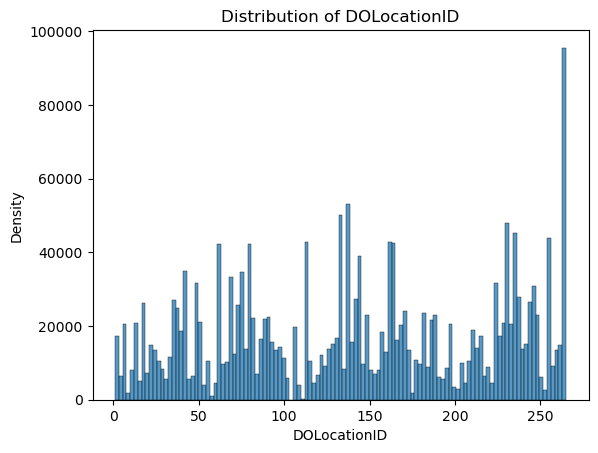

In [ ]:
sns.histplot(df['DOLocationID'])

# set plot title and labels
plt.title('Distribution of DOLocationID')
plt.xlabel('DOLocationID')
plt.ylabel('Density')

# show the plot
plt.show()

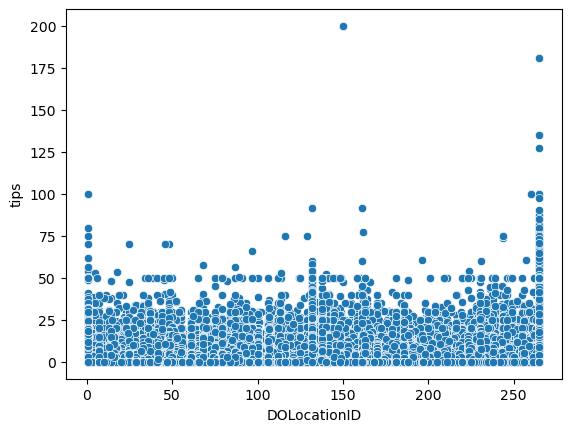

In [ ]:
sns.scatterplot(x='DOLocationID', y='tips', data=df)
plt.show()

# Congestion Surcharge

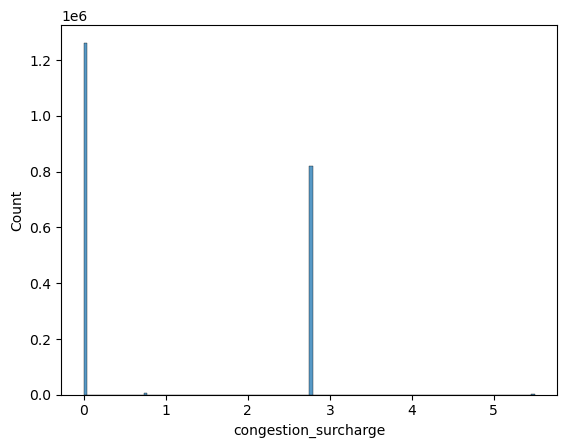

In [ ]:
sns.histplot(df['congestion_surcharge'])
plt.show()

In [ ]:
df['congestion_surcharge'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2088048 entries, 0 to 2088047
Series name: congestion_surcharge
Non-Null Count    Dtype  
--------------    -----  
2088048 non-null  float64
dtypes: float64(1)
memory usage: 15.9 MB


In [ ]:
df['congestion_surcharge_flag'] = df['congestion_surcharge'].apply(lambda x: True if x!=0 else False)

In [ ]:
df['congestion_surcharge_flag'].head(10)

0     True
1     True
2    False
3     True
4     True
5    False
6     True
7     True
8     True
9     True
Name: congestion_surcharge_flag, dtype: bool

<AxesSubplot:xlabel='congestion_surcharge_flag', ylabel='tips'>

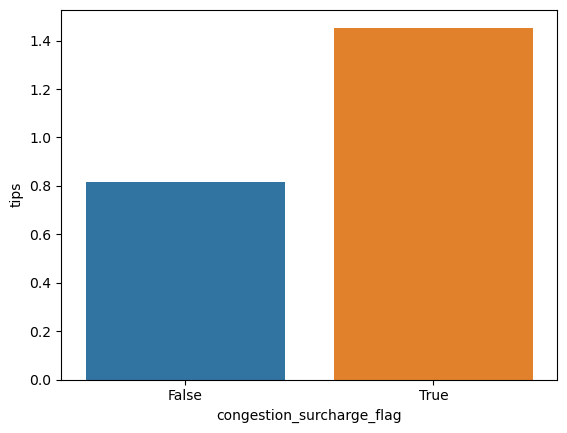

In [ ]:
sns.barplot(x='congestion_surcharge_flag', y='tips', data=df, ci=None)

# Month

<AxesSubplot:xlabel='month', ylabel='Count'>

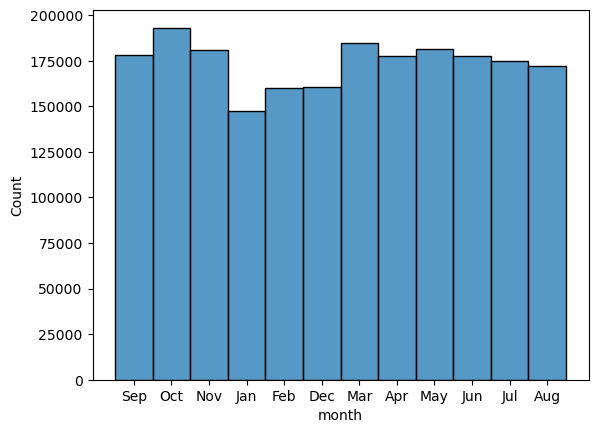

In [ ]:
sns.histplot(df['month'])

<AxesSubplot:xlabel='month', ylabel='tips'>

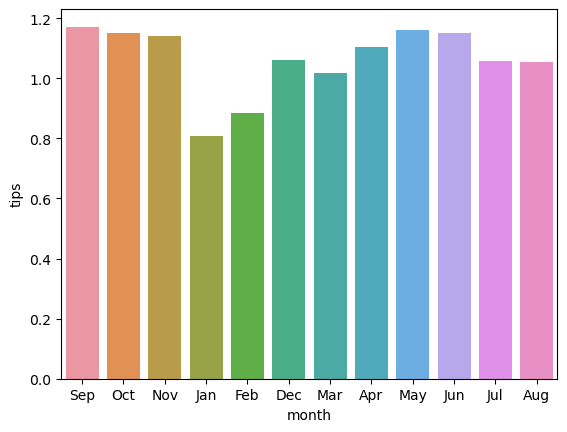

In [ ]:
sns.barplot(x='month', y='tips', data=df, ci=None)

# Period of Day

<AxesSubplot:xlabel='period_of_day', ylabel='Count'>

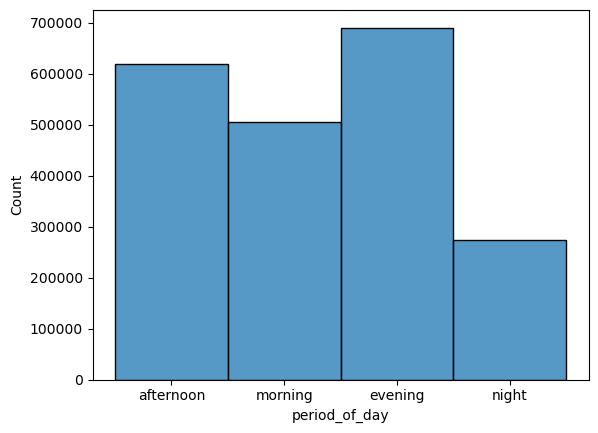

In [ ]:
sns.histplot(df['period_of_day'])

<AxesSubplot:xlabel='period_of_day', ylabel='tips'>

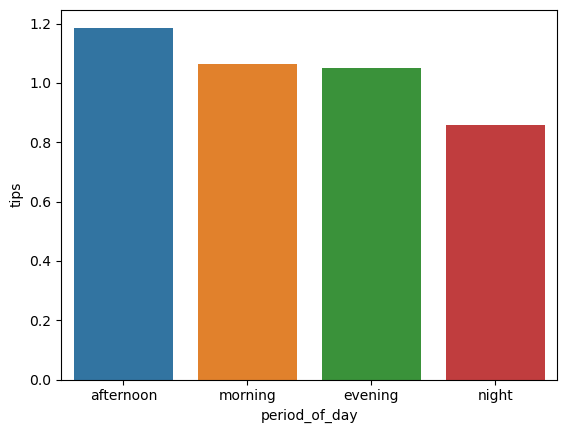

In [ ]:
sns.barplot(x='period_of_day', y='tips', data=df, ci=None)

In [ ]:
df['date'] = df['pickup_datetime'].dt.date

# Date vs. Tips

<AxesSubplot:xlabel='date', ylabel='tips'>

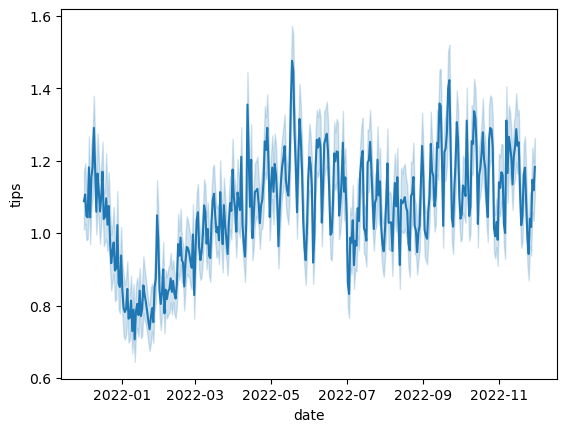

In [ ]:
sns.lineplot(x='date', y='tips', data=df)

In [ ]:
# simplified the df
df1 = df[['hvfhs_license_num','request_datetime']]
df1['Date'] = pd.to_datetime(df1['request_datetime']).dt.date

/var/folders/92/dd2dtnsn4l77d06s5jjtcfcc0000gn/T/ipykernel_62458/111487313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['request_datetime']).dt.date


In [ ]:
df1

,hvfhs_license_num,request_datetime,Date
0,HV0003,2022-09-18 15:21:17,2022-09-18
1,HV0003,2022-09-17 07:55:00,2022-09-17
2,HV0003,2022-09-03 11:30:26,2022-09-03
3,HV0003,2022-09-30 22:36:33,2022-09-30
4,HV0003,2022-09-01 13:26:04,2022-09-01
...,...,...,...
2088043,HV0003,2022-08-16 08:03:58,2022-08-16
2088044,HV0003,2022-08-31 01:27:38,2022-08-31
2088045,HV0003,2022-08-19 12:10:33,2022-08-19
2088046,HV0003,2022-08-22 13:05:34,2022-08-22


In [ ]:
# Set the index of the DataFrame to the desired column
df1.set_index('Date', inplace = True)

In [ ]:
result = df1.groupby(['Date', 'hvfhs_license_num']).size().reset_index(name='count')

In [ ]:
result

,Date,hvfhs_license_num,count
0,2021-11-30,HV0003,15
1,2021-11-30,HV0005,6
2,2021-12-01,HV0003,3667
3,2021-12-01,HV0005,1418
4,2021-12-02,HV0003,4032
...,...,...,...
727,2022-11-28,HV0005,1514
728,2022-11-29,HV0003,3833
729,2022-11-29,HV0005,1575
730,2022-11-30,HV0003,4372


In [ ]:
df_pivot = pd.pivot_table(df1, values='request_datetime', index='hvfhs_license_num', columns='Date', aggfunc='count')

In [ ]:
df_pivot = df_pivot.iloc[:, 1:] # drop 2021-11-30

In [ ]:
df_pivot

Date,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,...,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30
hvfhs_license_num,,,,,,,,,,,,,,,,,,,,,
HV0003,3667,4032,4698,5006,4359,3632,3854,4093,4496,4836,...,3775,3868,4139,3947,3651,3974,3808,3595,3833,4372
HV0005,1418,1436,1756,1835,1514,1322,1244,1433,1489,1621,...,1621,1522,1750,1595,1429,1582,1551,1514,1575,1826


In [ ]:
# Calculate the percentage of the relative to the total for each row
df_percent = df_pivot.div(df_pivot.sum(axis=0), axis=1)
df_percent = df_percent.T

In [ ]:
df_percent

hvfhs_license_num,HV0003,HV0005
Date,,
2021-12-01,0.721141,0.278859
2021-12-02,0.737381,0.262619
2021-12-03,0.727921,0.272079
2021-12-04,0.731764,0.268236
2021-12-05,0.742210,0.257790
...,...,...
2022-11-26,0.715263,0.284737
2022-11-27,0.710580,0.289420
2022-11-28,0.703660,0.296340


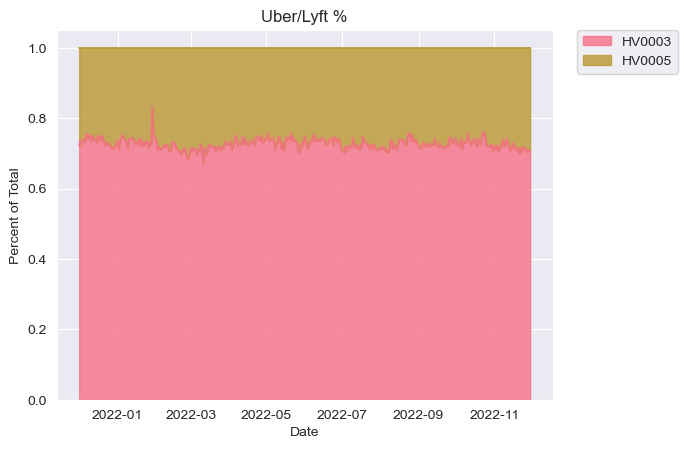

In [ ]:
# Create the stacked area chart using Seaborn
sns.set_style('darkgrid')
sns.set_palette('husl')
df_percent.plot(kind='area', stacked=True, alpha=0.8)
# Add labels and legend
plt.title('Uber/Lyft %')
plt.xlabel('Date')
plt.ylabel('Percent of Total')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

# trip_miles

In [ ]:
# simplified the df
df2 = df[['trip_miles','tips']]
df2

,trip_miles,tips
0,19.33,12.58
1,2.06,0.00
2,1.58,0.00
3,2.09,3.00
4,3.50,3.00
...,...,...
2088043,8.32,0.00
2088044,9.20,0.00
2088045,1.35,3.00
2088046,1.34,2.00


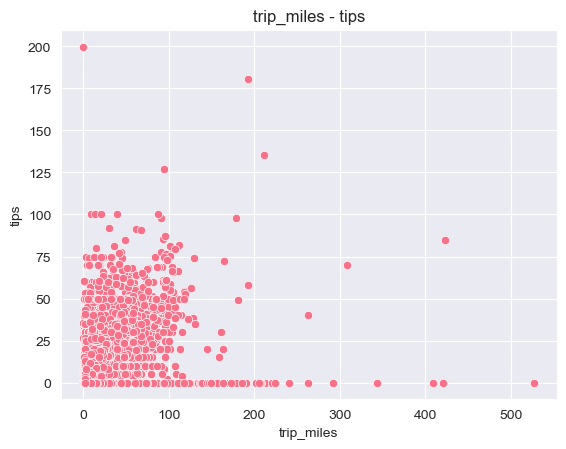

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df2, x="trip_miles", y="tips")
plt.title('trip_miles - tips')
plt.show()

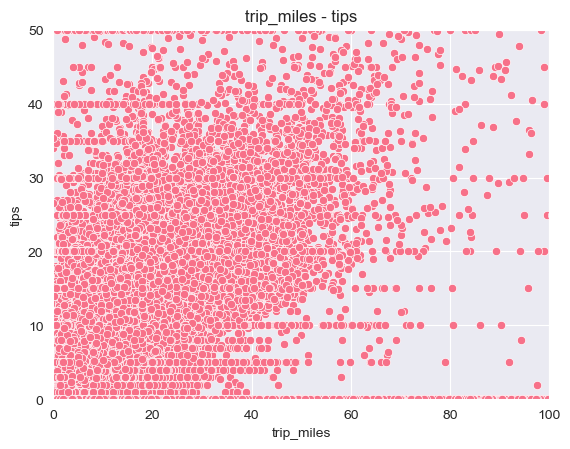

In [ ]:
import matplotlib.pyplot as plt
plt.xlim(0, 100)
plt.ylim(0, 50)
sns.scatterplot(data=df2, x="trip_miles", y="tips")
plt.title('trip_miles - tips')
plt.show()

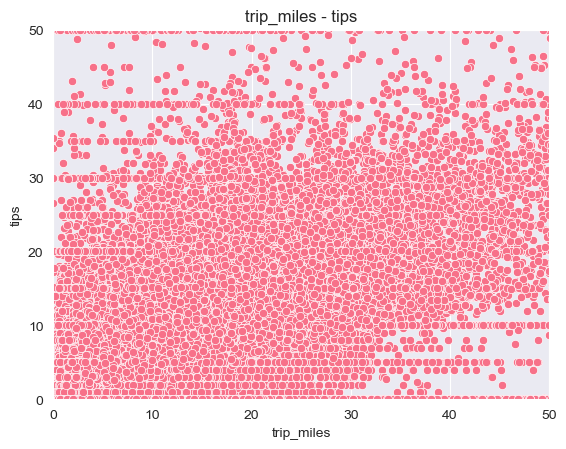

In [ ]:
import matplotlib.pyplot as plt
plt.xlim(0, 50)
plt.ylim(0, 50)
sns.scatterplot(data=df2, x="trip_miles", y="tips")
plt.title('trip_miles - tips')
plt.show()

In [ ]:
# probably insignificant result for trip_miles & tips

# shared_request_flag

In [ ]:
# convert into boolean dtype
# Replace string by boolean 
df['shared_request_flag'] = df['shared_request_flag'].map({'Y': True, 'N': False})   
df['shared_request_flag'].unique()

array([False,  True])

In [ ]:
# create the date variable
df['Date'] = pd.to_datetime(df['pickup_datetime']).dt.date

In [ ]:
result2 = df.groupby(['Date', 'shared_request_flag']).size().reset_index(name='count')

In [ ]:
result2

,Date,shared_request_flag,count
0,2021-12-01,False,5089
1,2021-12-02,False,5465
2,2021-12-03,False,6439
3,2021-12-04,False,6827
4,2021-12-05,False,5901
...,...,...,...
523,2022-11-28,True,129
524,2022-11-29,False,5294
525,2022-11-29,True,110
526,2022-11-30,False,6061


In [ ]:
df_pivot2 = pd.pivot_table(result2, values='count', index='Date', columns='shared_request_flag', aggfunc='sum', fill_value=0)
df_pivot2 = df_pivot2.T

In [ ]:
df_pivot2  = df_pivot2.rename(columns = {'True':'Tiping rate'})
df_pivot2 

Date,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,...,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30
shared_request_flag,,,,,,,,,,,,,,,,,,,,,
False,5089,5465,6439,6827,5901,4965,5091,5526,5973,6452,...,5252,5227,5733,5376,4964,5413,5211,4987,5294,6061
True,0,0,0,0,0,0,0,0,0,0,...,152,148,161,149,125,150,144,129,110,160


In [ ]:
df_percent2 = df_pivot2.div(df_pivot2.sum(axis=0), axis=1)

In [ ]:
df_percent2
df_percent3 = df_percent3

In [ ]:
df_percent3 = pd.DataFrame(df_percent2.iloc[1])
df_percent3.reset_index(inplace=True)
# df_percent3 = df_percent3.rename(columns = {'True':'Tipping rate'}) # doesn't work as True is boolean, use indexing
df_percent3.columns.values[1] = 'Tipping rate'

In [ ]:
df_percent3

,Date,Tipping rate
0,2021-12-01,0.000000
1,2021-12-02,0.000000
2,2021-12-03,0.000000
3,2021-12-04,0.000000
4,2021-12-05,0.000000
...,...,...
360,2022-11-26,0.026964
361,2022-11-27,0.026891
362,2022-11-28,0.025215
363,2022-11-29,0.020355


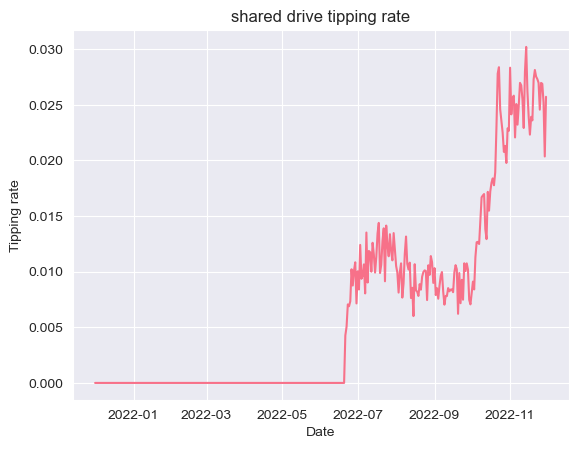

In [ ]:
sns.lineplot(data=df_percent3 , x='Date', y='Tipping rate')
plt.title('shared drive tipping rate')
plt.show()

# pickup_hour 

In [ ]:
# filter rows where 'value' is True
df5 = df[df['tips'] != 0]
df5

,hvfhs_license_num,trip_miles,shared_request_flag,pickup_hour,tips,pickup_datetime
0,HV0003,19.330,N,15,12.58,2022-09-18 15:26:29
3,HV0003,2.090,N,22,3.00,2022-09-30 22:41:03
4,HV0003,3.500,N,13,3.00,2022-09-01 13:29:54
16,HV0003,1.920,N,4,5.00,2022-09-17 04:36:58
21,HV0003,7.820,N,9,4.78,2022-09-04 09:15:51
...,...,...,...,...,...,...
2088024,HV0003,3.630,N,12,2.29,2022-08-15 12:49:02
2088034,HV0003,3.020,N,11,1.00,2022-08-24 11:58:20
2088037,HV0005,3.355,N,15,7.95,2022-08-05 15:15:05
2088045,HV0003,1.350,N,12,3.00,2022-08-19 12:14:16


In [ ]:
result3 = df5.groupby(['pickup_hour', 'tips']).size().reset_index(name='count')
result3

,pickup_hour,tips,count
0,0,0.01,12
1,0,0.06,1
2,0,0.09,1
3,0,0.10,1
4,0,0.36,1
...,...,...,...
39717,23,74.72,1
39718,23,75.00,1
39719,23,75.33,1
39720,23,77.78,1


In [ ]:
df3_pivot = pd.pivot_table(result3, values= ['tips','count'], index='pickup_hour',aggfunc='sum')
df3_pivot['average tip per trip'] = df3_pivot['tips']/ df3_pivot['count']
df3_pivot

,count,tips,average tip per trip
pickup_hour,,,
0,13445,17037.22,1.267179
1,8720,12009.97,1.377290
2,5896,8456.88,1.434342
3,4376,8228.70,1.880416
4,4950,11584.46,2.340295
5,6546,13455.23,2.055489
6,9830,16572.33,1.685893
7,14546,18881.96,1.298086
8,18732,19705.03,1.051945


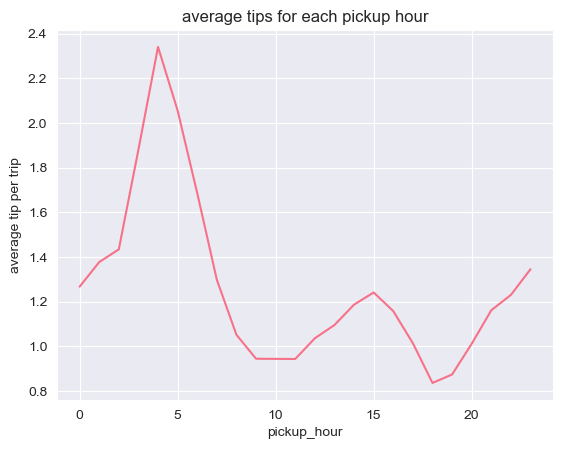

In [ ]:
sns.lineplot(data=df3_pivot , x='pickup_hour', y='average tip per trip')
plt.title('average tips for each pickup hour')
plt.show()

# PULocationID: 
1. Distplot: distribution
2. PULocationID vs. Tip

<li>Pick-up Location somehow matters but there are too many (250+) categories to make this variable analyzable. We can consider using borough and service zone as variables directly. 

/Users/alicezhou/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


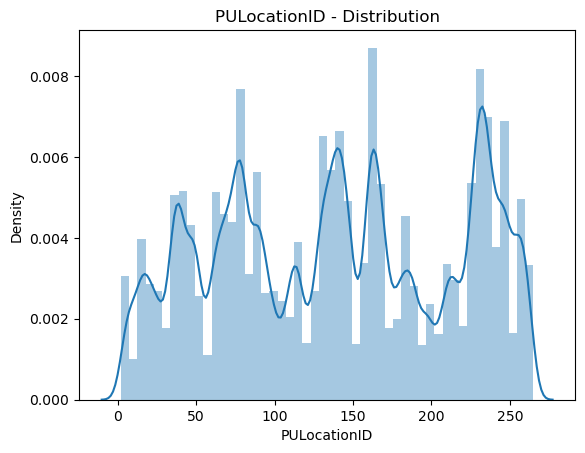

In [ ]:
#Distribution of PULocationID
sns.distplot(df['PULocationID'])
plt.title('PULocationID - Distribution')
plt.show()

In [ ]:
zoneid[zoneid['LocationID'].isin(counts.index[0:10])]

,LocationID,Borough,Zone,service_zone
60,61,Brooklyn,Crown Heights North,Boro Zone
67,68,Manhattan,East Chelsea,Yellow Zone
78,79,Manhattan,East Village,Yellow Zone
131,132,Queens,JFK Airport,Airports
137,138,Queens,LaGuardia Airport,Airports
160,161,Manhattan,Midtown Center,Yellow Zone
163,164,Manhattan,Midtown South,Yellow Zone
229,230,Manhattan,Times Sq/Theatre District,Yellow Zone
230,231,Manhattan,TriBeCa/Civic Center,Yellow Zone
233,234,Manhattan,Union Sq,Yellow Zone


In [ ]:
counts = df['PULocationID'].value_counts().sort_values(ascending=False)
#totals = counts.sum()
#pct_counts = counts.div(totals) * 100
print(counts.head(n=10))

138    37330
132    35458
79     31439
230    27792
61     27725
161    25775
68     25408
231    25171
234    23829
164    23188
Name: PULocationID, dtype: int64


In [ ]:
zone[zone['LocationID'].isin(counts.index[0:10])]

,LocationID,Borough,Zone,service_zone
60,61,Brooklyn,Crown Heights North,Boro Zone
67,68,Manhattan,East Chelsea,Yellow Zone
78,79,Manhattan,East Village,Yellow Zone
131,132,Queens,JFK Airport,Airports
137,138,Queens,LaGuardia Airport,Airports
160,161,Manhattan,Midtown Center,Yellow Zone
163,164,Manhattan,Midtown South,Yellow Zone
229,230,Manhattan,Times Sq/Theatre District,Yellow Zone
230,231,Manhattan,TriBeCa/Civic Center,Yellow Zone
233,234,Manhattan,Union Sq,Yellow Zone


In [ ]:
zone[['Borough','service_zone']]

,Borough,service_zone
0,EWR,EWR
1,Queens,Boro Zone
2,Bronx,Boro Zone
3,Manhattan,Yellow Zone
4,Staten Island,Boro Zone
...,...,...
260,Manhattan,Yellow Zone
261,Manhattan,Yellow Zone
262,Manhattan,Yellow Zone
263,Unknown,NaN


In [ ]:
zone.groupby(['service_zone','Borough']).count()

LocationID  Zone
service_zone Borough                        
Airports     Queens                  2     2
Boro Zone    Bronx                  43    43
             Brooklyn               61    61
             Manhattan              14    14
             Queens                 67    67
             Staten Island          20    20
EWR          EWR                     1     1
Yellow Zone  Manhattan              55    55

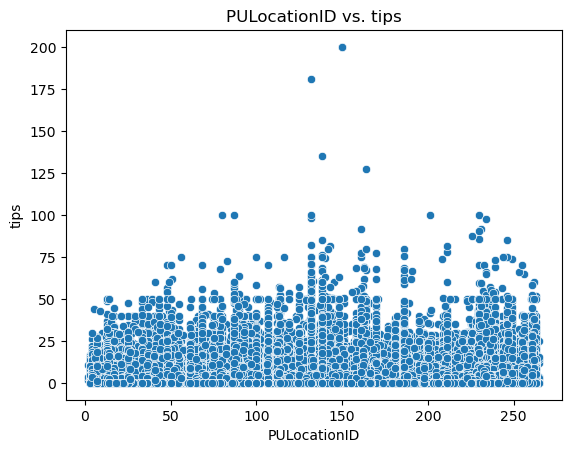

In [ ]:
#PULocationID vs. Tip
sns.scatterplot(data=df, x="PULocationID", y="tips")
plt.title('PULocationID vs. tips')
plt.show()

# tolls
1. Displot
2. tolls vs. tip
3. create tolls_flag
4. tolls_flag vs. tip

In [ ]:
mean = np.mean(df['tolls'])
median = np.median(df['tolls'])
std_dev = np.std(df['tolls'])
variance = np.var(df['tolls'])
min_val = np.min(df['tolls'])
max_val = np.max(df['tolls'])

# Print summary statistics
print("Mean:", mean)
print("Median:", median)
print("Standard deviation:", std_dev)
print("Variance:", variance)
print("Minimum value:", min_val)
print("Maximum value:", max_val)

Mean: 1.1207723433560912
Median: 0.0
Standard deviation: 3.8294936217514826
Variance: 14.665021399035288
Minimum value: 0.0
Maximum value: 93.32


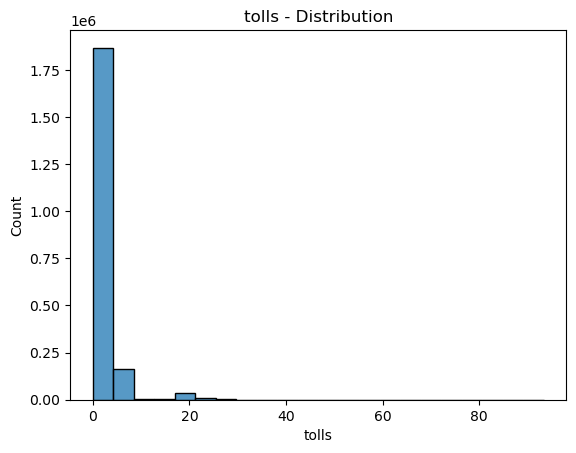

In [ ]:
sns.histplot(df['tolls'])
plt.title('tolls - Distribution')
plt.show()

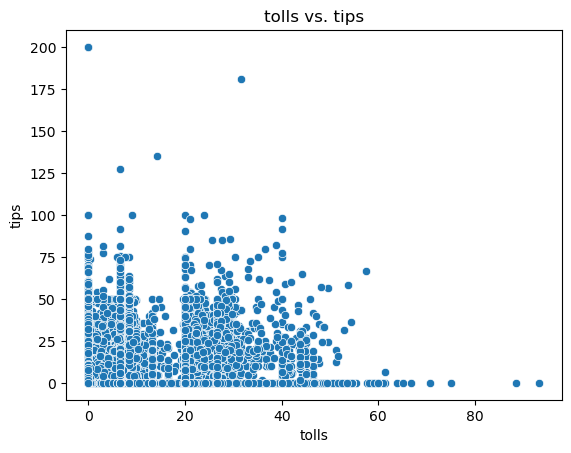

In [ ]:
sns.scatterplot(data=df, x="tolls", y="tips")
plt.title('tolls vs. tips')
plt.show()

In [ ]:
df['tolls_flag'] = df['tolls'].apply(lambda x:1 if x>0 else 0)
df[['tolls_flag','tolls']]

,tolls_flag,tolls
0,0,0.00
1,0,0.00
2,0,0.00
3,0,0.00
4,0,0.00
...,...,...
2088043,0,0.00
2088044,1,6.55
2088045,0,0.00
2088046,0,0.00


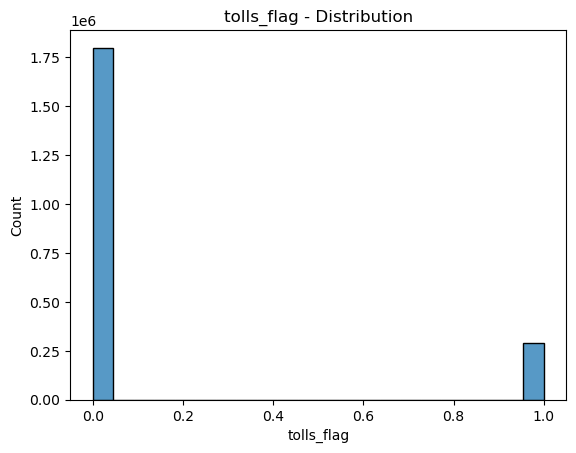

In [ ]:
sns.histplot(df['tolls_flag'])
plt.title('tolls_flag - Distribution')
plt.show()

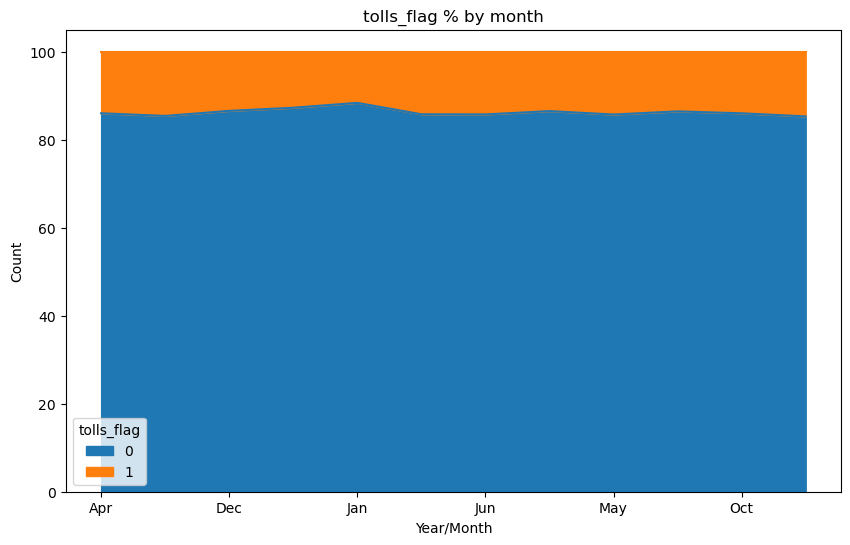

In [ ]:
# Create a new DataFrame with the total counts of tolls_flag by year and month
##df = df.sort_values('month', ascending=True)
counts = df.groupby(['month'])['tolls_flag'].value_counts().unstack(fill_value=0)
totals = counts.sum(axis=1)
pct_counts = counts.div(totals, axis=0) * 100
# Create the stacked area chart
pct_counts.plot.area(stacked=True, figsize=(10, 6))
# Set the chart title and labels
plt.title('tolls_flag % by month')
plt.xlabel('Year/Month')
plt.ylabel('Count')
# Show the chart
plt.show()

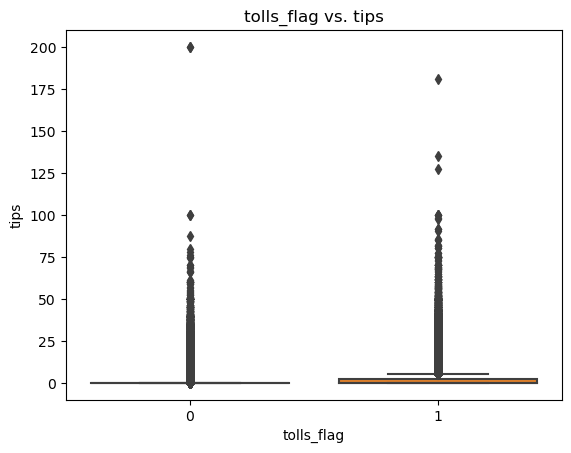

In [ ]:
sns.boxplot(x='tolls_flag', y='tips', data=df)
plt.title('tolls_flag vs. tips')
plt.xlabel('tolls_flag')
plt.ylabel('tips')
plt.show()

# wav_match_flag:
1. Displot change by month?
2. wav_match_flag - tips

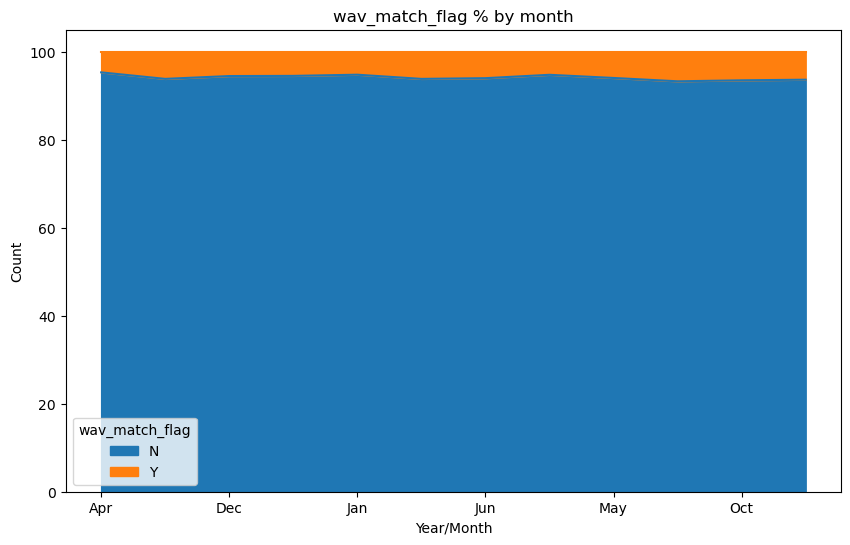

In [ ]:
# Create a new DataFrame with the total counts of tolls_flag by year and month
##df = df.sort_values('month', ascending=True)
counts = df.groupby(['month'])['wav_match_flag'].value_counts().unstack(fill_value=0)
totals = counts.sum(axis=1)
pct_counts = counts.div(totals, axis=0) * 100
# Create the stacked area chart
pct_counts.plot.area(stacked=True, figsize=(10, 6))
# Set the chart title and labels
plt.title('wav_match_flag % by month')
plt.xlabel('Year/Month')
plt.ylabel('Count')
# Show the chart
plt.show()

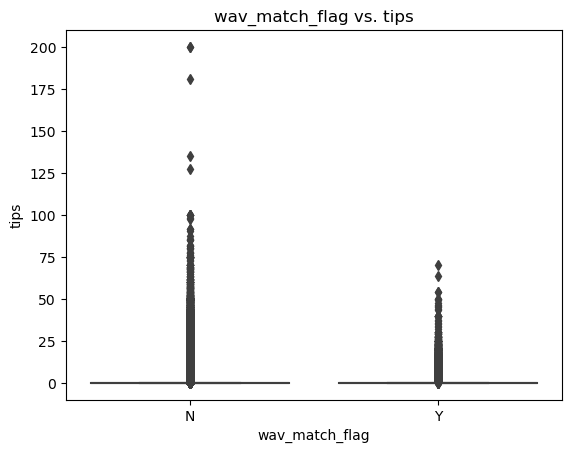

In [ ]:
sns.boxplot(x='wav_match_flag', y='tips', data=df)
plt.title('wav_match_flag vs. tips')
plt.xlabel('wav_match_flag')
plt.ylabel('tips')
plt.show()

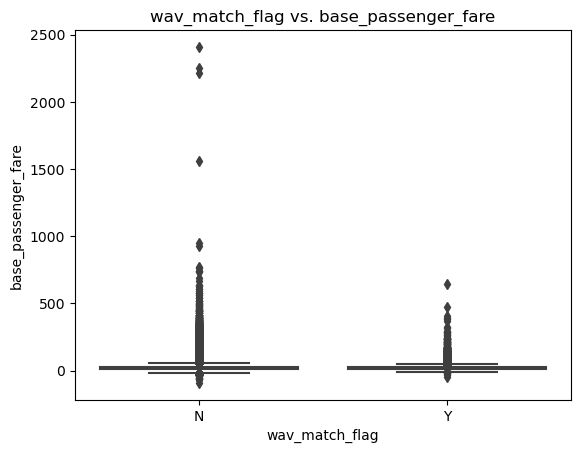

In [ ]:
sns.boxplot(x='wav_match_flag', y='base_passenger_fare', data=df)
plt.title('wav_match_flag vs. base_passenger_fare')
plt.xlabel('wav_match_flag')
plt.ylabel('base_passenger_fare')
plt.show()

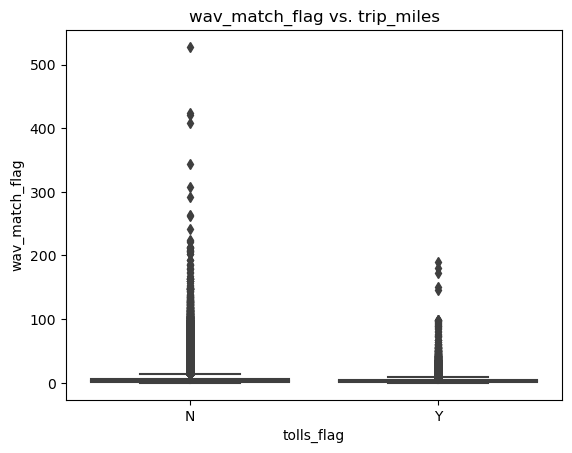

In [ ]:
sns.boxplot(x='wav_match_flag', y='trip_miles', data=df)
plt.title('wav_match_flag vs. trip_miles')
plt.xlabel('tolls_flag')
plt.ylabel('wav_match_flag')
plt.show()

# pickup_day:
1. Displot 
2. Pickup_day - tip

In [ ]:
df['pickup_day'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6:'Sunday'}, inplace=True)

In [ ]:
df['pickup_day'] 

0             Sunday
1           Saturday
2           Saturday
3             Friday
4           Thursday
             ...    
2088043      Tuesday
2088044    Wednesday
2088045       Friday
2088046       Monday
2088047       Monday
Name: pickup_day, Length: 2088048, dtype: object

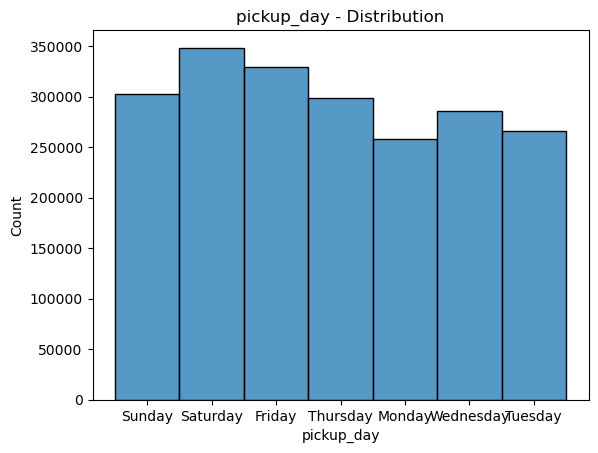

In [ ]:
sns.histplot(df['pickup_day'])
plt.title('pickup_day - Distribution')
plt.show()

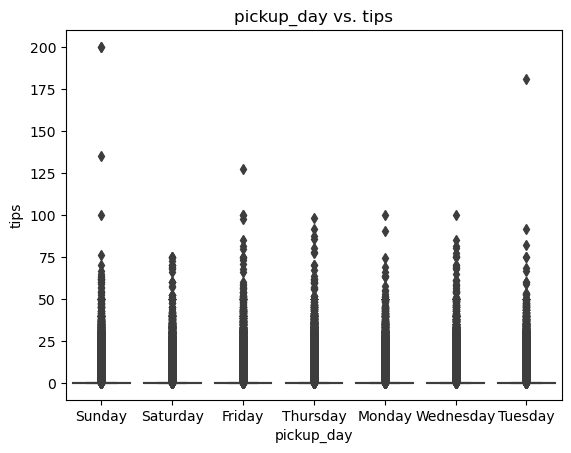

In [ ]:
#lineplot + confidence interval 
sns.boxplot(x='pickup_day', y='tips', data=df)
plt.title('pickup_day vs. tips')
plt.xlabel('pickup_day')
plt.ylabel('tips')
plt.show()

In [ ]:
np.min(df['base_passenger_fare'])

-91.22

<AxesSubplot:xlabel='pickup_day', ylabel='tips'>

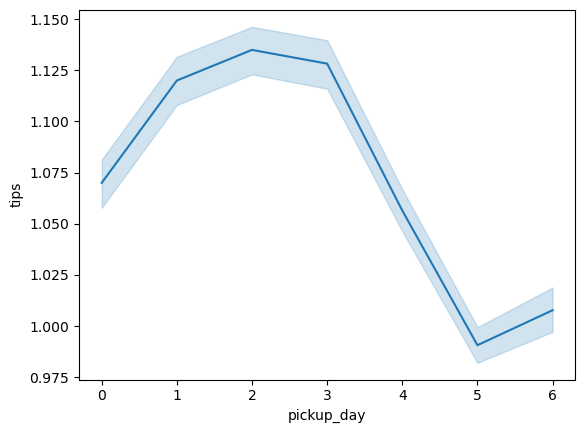

In [ ]:
import seaborn as sns
#from datetime import datetime
#import calendar
#abbr_to_num = {name: num for num, name in enumerate(calendar.month_abbr) if num}
#df['month'] = df['month'].map(abbr_to_num)
sns.lineplot(x='pickup_day', y='tips', data=df)

In [ ]:
#Pickup Datetime

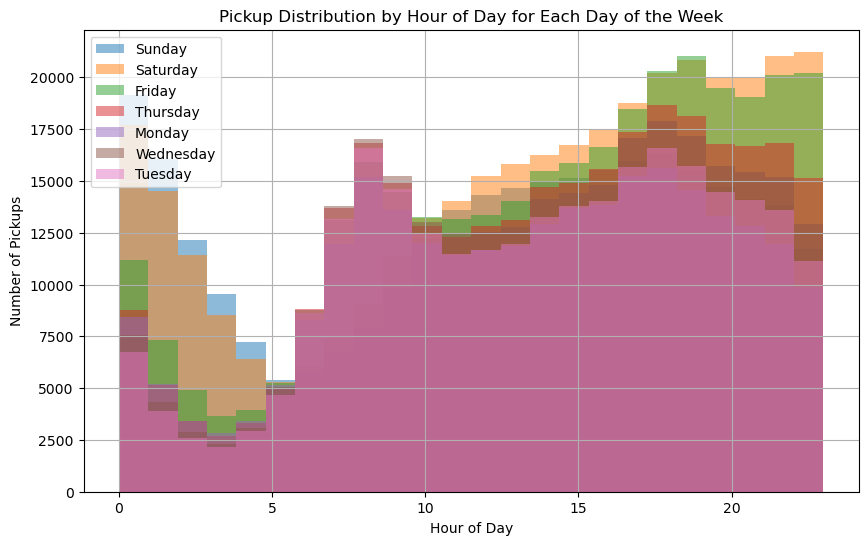

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert pickup_datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Create a new column for the day of the week
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

# Create a histogram of pickups per hour for each day of the week
fig, ax = plt.subplots(figsize=(10,6))

for day in df['day_of_week'].unique():
    df_day = df[df['day_of_week'] == day]
    df_day['pickup_datetime'].dt.hour.hist(bins=24, alpha=0.5, label=day, ax=ax)

ax.legend()
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Pickups')
ax.set_title('Pickup Distribution by Hour of Day for Each Day of the Week')
plt.show()

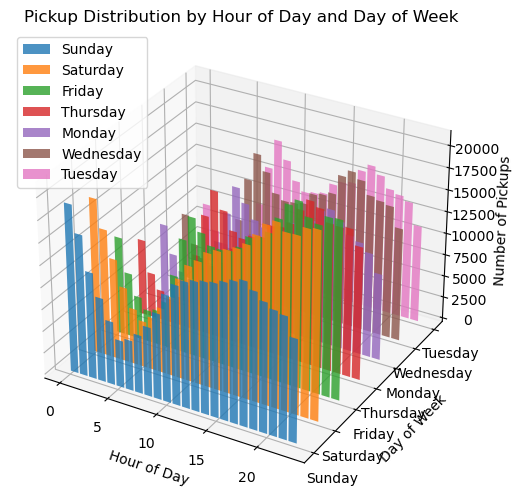

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load CSV file into a Pandas dataframe
df = pd.read_csv('df.csv')

# Convert pickup_datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Create a new column for the day of the week
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

# Create a 3D histogram of pickups per hour for each day of the week
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

days = df['day_of_week'].unique()
for i, day in enumerate(days):
    df_day = df[df['day_of_week'] == day]
    hist, bins = np.histogram(df_day['pickup_datetime'].dt.hour, bins=24)
    xs = (bins[:-1] + bins[1:]) / 2
    ys = [i] * len(hist)
    zs = hist
    ax.bar(xs, zs, zs=ys, zdir='y', alpha=0.8, label=day)

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Week')
ax.set_zlabel('Number of Pickups')
ax.set_title('Pickup Distribution by Hour of Day and Day of Week')
ax.set_yticks(range(len(days)))
ax.set_yticklabels(days)
ax.legend()
plt.show()

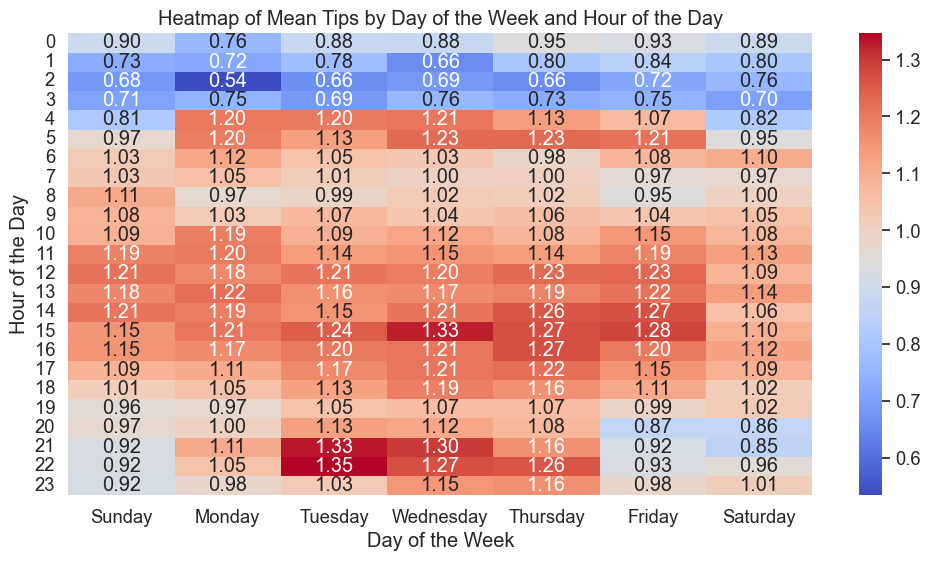

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'pickup_datetime' and 'tips' columns
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df['hour_of_day'] = df['pickup_datetime'].dt.hour

# Create the pivot table
pivot_table = pd.pivot_table(df, index='hour_of_day', columns='day_of_week', values='tips', aggfunc='mean')

# Sort the columns based on the desired ascending order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
pivot_table = pivot_table[day_order]

# Create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap of Mean Tips by Day of the Week and Hour of the Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


In [ ]:
#fare

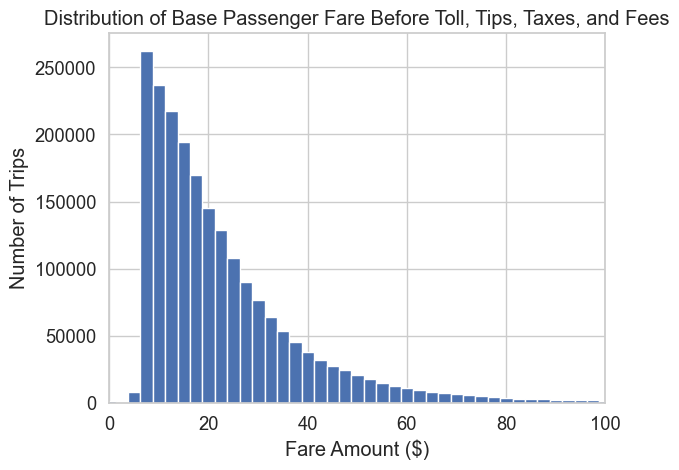

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a histogram of base passenger fare before tolls, tips, taxes, and fees
plt.hist(df['base_passenger_fare'], bins=1000)
plt.title('Distribution of Base Passenger Fare Before Toll, Tips, Taxes, and Fees')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Number of Trips')
plt.xlim(right=100)
plt.xlim(left=0)
plt.show()

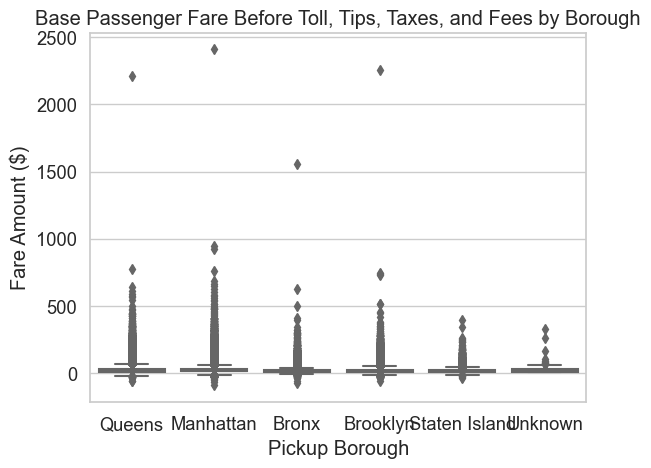

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV file into a Pandas dataframe
df = pd.read_csv('df.csv')

# Create a box plot of base passenger fare before tolls, tips, taxes, and fees by borough
sns.boxplot(x='PU_Borough', y='base_passenger_fare', data=df)
plt.title('Base Passenger Fare Before Toll, Tips, Taxes, and Fees by Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Fare Amount ($)')
plt.show()

In [ ]:
#Base_pass_fare - tip


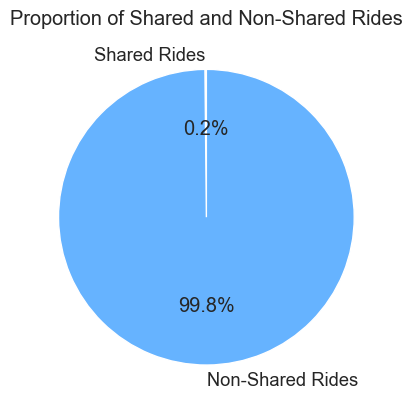

The number of shared rides is: 3269
The number of non-shared rides is: 2084779


In [ ]:
import matplotlib.pyplot as plt

# Count the number of shared and non-shared rides
shared_rides = len(df[df['shared_match_flag'] == 'Y'])
non_shared_rides = len(df[df['shared_match_flag'] == 'N'])

# Create a pie chart
labels = ['Shared Rides', 'Non-Shared Rides']
sizes = [shared_rides, non_shared_rides]
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Proportion of Shared and Non-Shared Rides')

# Show the plot
plt.show()

print(f'The number of shared rides is: {shared_rides}')

total_trips = len(df)
not_shared_rides = total_trips - shared_rides

print(f'The number of non-shared rides is: {not_shared_rides}')

In [ ]:
#tip----shared rides



In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
trips_original = pd.read_csv('df.csv')

In [ ]:
trips = trips_original.copy()

In [ ]:
format_data = "%Y-%m-%d %H:%M:%S"
for var in ['request_datetime','pickup_datetime']:
    trips[var] = trips[var].apply(lambda x: datetime.strptime(x, format_data))

In [ ]:
trips.head(n=3)

,hvfhs_license_num,request_datetime,pickup_datetime,PULocationID,DOLocationID,trip_miles,base_passenger_fare,tolls,congestion_surcharge,airport_fee,...,wav_match_flag,month,PU_Borough,DO_Borough,PU_service_zone,DO_service_zone,pickup_day,period_of_day,period_of_month,pickup_hour
0,HV0003,2022-09-18 15:21:17,2022-09-18 15:26:29,132,68,19.33,70.05,0.0,2.75,2.5,...,N,Sep,Queens,Manhattan,Yellow Zone,Yellow Zone,6,afternoon,middle of month,15
1,HV0003,2022-09-17 07:55:00,2022-09-17 07:46:51,239,237,2.06,9.25,0.0,2.75,0.0,...,N,Sep,Manhattan,Manhattan,Yellow Zone,Yellow Zone,5,morning,middle of month,7
2,HV0003,2022-09-03 11:30:26,2022-09-03 11:35:04,78,167,1.58,9.75,0.0,0.00,0.0,...,N,Sep,Bronx,Bronx,Boro Zone,Boro Zone,5,morning,beginning of month,11


In [ ]:
trips.dtypes

hvfhs_license_num               object
request_datetime        datetime64[ns]
pickup_datetime         datetime64[ns]
PULocationID                     int64
DOLocationID                     int64
trip_miles                     float64
base_passenger_fare            float64
tolls                          float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
shared_request_flag             object
shared_match_flag               object
wav_match_flag                  object
month                           object
PU_Borough                      object
DO_Borough                      object
PU_service_zone                 object
DO_service_zone                 object
pickup_day                       int64
period_of_day                   object
period_of_month                 object
pickup_hour                      int64
wait_time                      float64
dtype: object

- request_datetime (wait time = request_datetime - pickup_datetime)
- airport fee
- PU Borough (Pick up Borough)
- DO Borough (Drop off Borough)
- period_of_month (pick up)

# Request_datetime / Wait_time

In [ ]:
import datetime

trips['wait_time']  = (trips['pickup_datetime'] - trips['request_datetime']).dt.total_seconds() / 60

In [ ]:
trips.head(n=3)

,hvfhs_license_num,request_datetime,pickup_datetime,PULocationID,DOLocationID,trip_miles,base_passenger_fare,tolls,congestion_surcharge,airport_fee,...,month,PU_Borough,DO_Borough,PU_service_zone,DO_service_zone,pickup_day,period_of_day,period_of_month,pickup_hour,wait_time
0,HV0003,2022-09-18 15:21:17,2022-09-18 15:26:29,132,68,19.33,70.05,0.0,2.75,2.5,...,Sep,Queens,Manhattan,Yellow Zone,Yellow Zone,6,afternoon,middle of month,15,5.200000
1,HV0003,2022-09-17 07:55:00,2022-09-17 07:46:51,239,237,2.06,9.25,0.0,2.75,0.0,...,Sep,Manhattan,Manhattan,Yellow Zone,Yellow Zone,5,morning,middle of month,7,-8.150000
2,HV0003,2022-09-03 11:30:26,2022-09-03 11:35:04,78,167,1.58,9.75,0.0,0.00,0.0,...,Sep,Bronx,Bronx,Boro Zone,Boro Zone,5,morning,beginning of month,11,4.633333


In [ ]:
trips['wait_time'].describe()

count    2.088048e+06
mean     5.118597e+00
std      3.722339e+00
min     -5.771667e+01
25%      3.066667e+00
50%      4.466667e+00
75%      6.516667e+00
max      3.588667e+02
Name: wait_time, dtype: float64

- count number of negative wait time

In [ ]:
trips.head(n=3)

,hvfhs_license_num,request_datetime,pickup_datetime,PULocationID,DOLocationID,trip_miles,base_passenger_fare,tolls,congestion_surcharge,airport_fee,...,month,PU_Borough,DO_Borough,PU_service_zone,DO_service_zone,pickup_day,period_of_day,period_of_month,pickup_hour,wait_time
0,HV0003,2022-09-18 15:21:17,2022-09-18 15:26:29,132,68,19.33,70.05,0.0,2.75,2.5,...,Sep,Queens,Manhattan,Yellow Zone,Yellow Zone,6,afternoon,middle of month,15,5.200000
1,HV0003,2022-09-17 07:55:00,2022-09-17 07:46:51,239,237,2.06,9.25,0.0,2.75,0.0,...,Sep,Manhattan,Manhattan,Yellow Zone,Yellow Zone,5,morning,middle of month,7,-8.150000
2,HV0003,2022-09-03 11:30:26,2022-09-03 11:35:04,78,167,1.58,9.75,0.0,0.00,0.0,...,Sep,Bronx,Bronx,Boro Zone,Boro Zone,5,morning,beginning of month,11,4.633333


In [ ]:
negative_wait_time = (trips['wait_time'] < 0).sum()
percent_neg_wait_time = negative_wait_time/len(trips['wait_time'])*100

In [ ]:
# number of negative wait time
print("The number of negative wait time is" , negative_wait_time)
# total number of wait time
print("The total number of wait time is" , len(trips['wait_time']))
# proportion of negative wait time
print("The percentage of negative wait time is" , percent_neg_wait_time ,'%')

The number of negative wait time is 25991
The total number of wait time is 2088048
The percentage of negative wait time is 1.244751078519268 %


In [ ]:
len(trips.request_datetime.unique())

2003977

In [ ]:
len(trips.request_datetime)

2088048

In [ ]:
len(trips.pickup_datetime.unique())

2008643

In [ ]:
len(trips.pickup_datetime)

2088048

In [ ]:
print(trips[trips['wait_time'] < 0].groupby(['hvfhs_license_num'])['shared_match_flag'].count())

hvfhs_license_num
HV0003    22054
HV0005     3937
Name: shared_match_flag, dtype: int64


In [ ]:
trips.groupby(['hvfhs_license_num'])['hvfhs_license_num'].count()

hvfhs_license_num
HV0003    1516801
HV0005     571247
Name: hvfhs_license_num, dtype: int64

In [ ]:
trips['wait_time'].min()

-57.71666666666667

In [ ]:
trips['wait_time'].max()

358.8666666666667

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

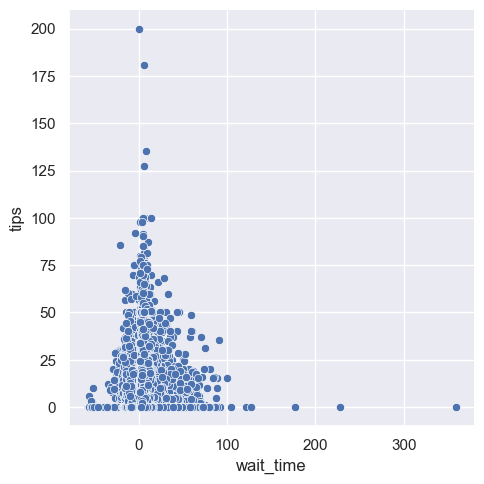

In [ ]:
sns.relplot(data=trips, x="wait_time", y="tips")
plt.show()

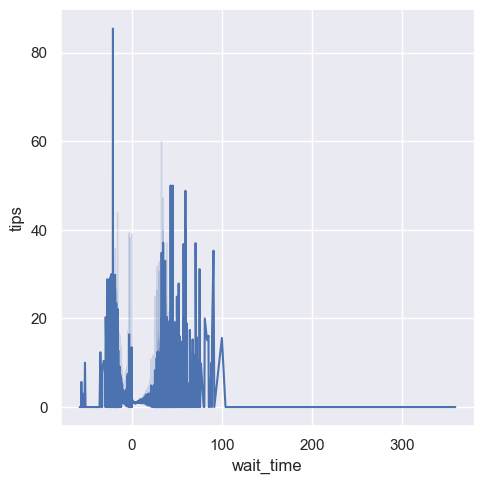

In [ ]:
sns.relplot(data=trips, x="wait_time", y="tips", kind="line")
plt.show()

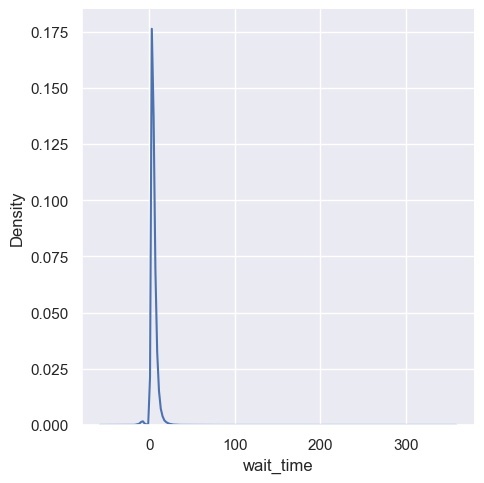

In [ ]:
sns.displot(trips, x="wait_time", kind="kde", cut=0)
plt.show()

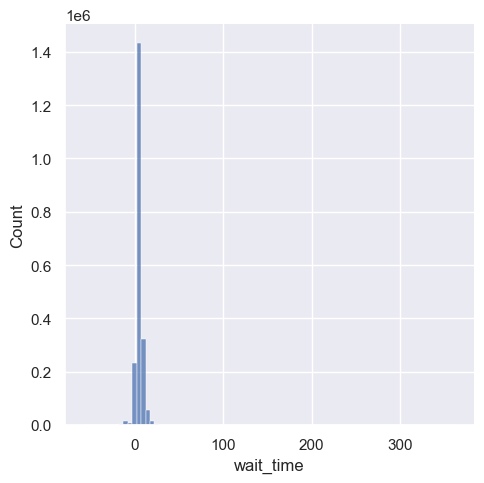

In [ ]:
sns.displot(trips, x="wait_time", binwidth=5)
plt.show()

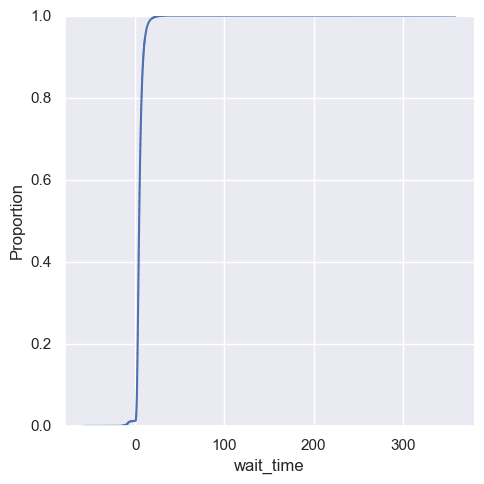

In [ ]:
sns.displot(trips, x="wait_time", kind="ecdf")
plt.show()

- check negative wait time vs. share_match ==Y

In [ ]:
# trips.dtypes

In [ ]:
trips[trips['wait_time'] >= 0]['tips'].mean()

1.0526076922218934

In [ ]:
trips[trips['wait_time'] < 0]['tips'].mean()

2.384226463006425

In [ ]:
trips['tips'].describe()

count    2.088048e+06
mean     1.069183e+00
std      3.018565e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.999800e+02
Name: tips, dtype: float64

In [ ]:
trips[(trips['wait_time'] < 0) & (trips['shared_match_flag'] == 'Y')]

,hvfhs_license_num,request_datetime,pickup_datetime,PULocationID,DOLocationID,trip_miles,base_passenger_fare,tolls,congestion_surcharge,airport_fee,...,month,PU_Borough,DO_Borough,PU_service_zone,DO_service_zone,pickup_day,period_of_day,period_of_month,pickup_hour,wait_time
386036,HV0005,2022-11-06 01:51:08,2022-11-06 01:04:06,259,119,12.184,24.29,0.0,0.00,0.0,...,Nov,Bronx,Bronx,Boro Zone,Boro Zone,6,night,beginning of month,1,-47.033333
459198,HV0005,2022-11-06 01:59:48,2022-11-06 01:04:30,158,25,5.201,29.09,0.0,0.75,0.0,...,Nov,Manhattan,Brooklyn,Boro Zone,Boro Zone,6,night,beginning of month,1,-55.300000


In [ ]:
print(trips[trips['wait_time'] < 0].groupby(['shared_match_flag'])['shared_match_flag'].count())

shared_match_flag
N    25989
Y        2
Name: shared_match_flag, dtype: int64


### Airport Fee

In [ ]:
print(trips.groupby(['airport_fee'])['airport_fee'].count())

airport_fee
0.00    1932286
1.00         44
1.25        721
2.50     154111
3.50          4
5.00        870
7.50         12
Name: airport_fee, dtype: int64


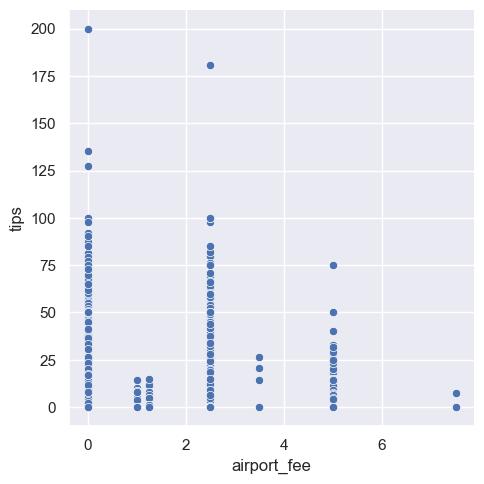

In [ ]:
sns.relplot(data=trips, x="airport_fee", y="tips")
plt.show()

In [ ]:
no_airport_trips = trips[(trips['airport_fee'] == 0)]

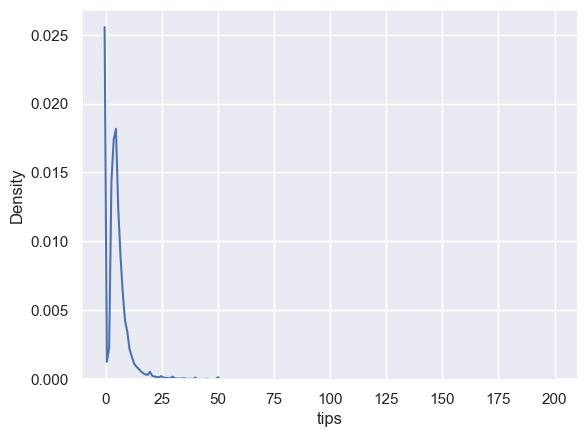

In [ ]:
sns.kdeplot(data=no_airport_trips, x="tips")
plt.show()

In [ ]:
no_airport_trips['tips'].describe()

count    1.932286e+06
mean     8.845828e-01
std      2.551222e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.999800e+02
Name: tips, dtype: float64

In [ ]:
airport_trips = trips[(trips['airport_fee'] != 0)]

In [ ]:
airport_trips['tips'].describe()

count    155762.000000
mean          3.359218
std           5.977970
min           0.000000
25%           0.000000
50%           0.000000
75%           5.730000
max         180.660000
Name: tips, dtype: float64

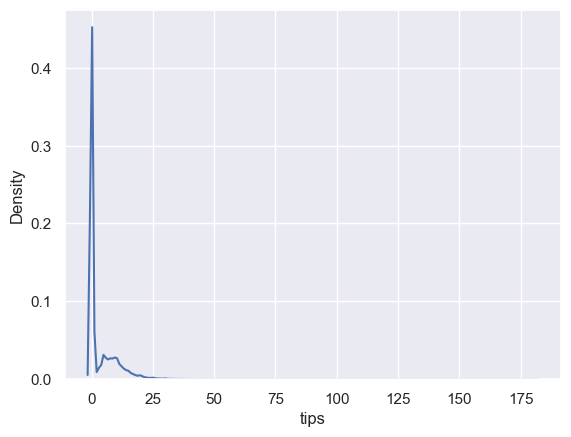

In [ ]:
sns.kdeplot(data=airport_trips, x="tips")
plt.show()

### period_of_month

In [ ]:
trips.groupby(['period_of_month'])['tips'].mean().sort_values(ascending=False)

period_of_month
middle of month       1.094646
end of month          1.064575
beginning of month    1.047730
Name: tips, dtype: float64

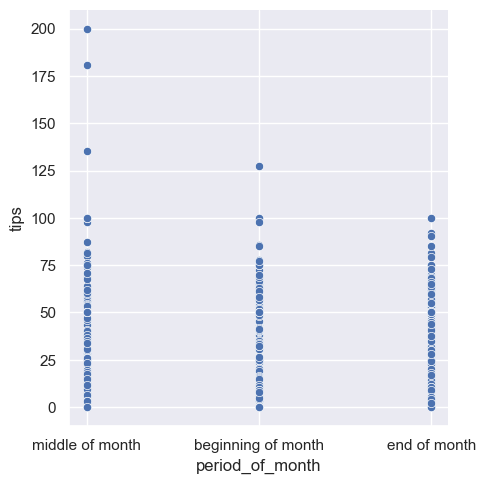

In [ ]:
sns.relplot(data=trips, x="period_of_month", y="tips")
plt.show()

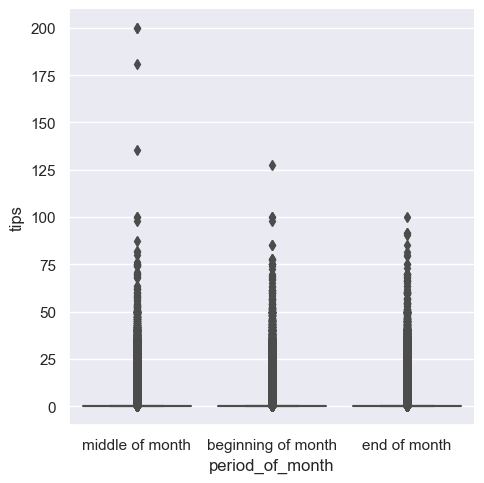

In [ ]:
sns.catplot(data=trips, x="period_of_month", y="tips", kind="box")
plt.show()

# Pick Up / Drop Off Borough

In [ ]:
trips.groupby(['PU_Borough'])['PU_Borough'].count().sort_values(ascending=False)

PU_Borough
Manhattan        862018
Brooklyn         540646
Queens           412287
Bronx            245398
Staten Island     27598
Unknown             101
Name: PU_Borough, dtype: int64

In [ ]:
trips.groupby(['PU_Borough'])['tips'].mean().sort_values(ascending=False)

PU_Borough
Manhattan        1.374710
Queens           1.203238
Unknown          0.991188
Staten Island    0.839724
Brooklyn         0.822639
Bronx            0.339731
Name: tips, dtype: float64

In [ ]:
trips.groupby(['PU_Borough'])['tips'].sum().sort_values(ascending=False)

PU_Borough
Manhattan        1185025.07
Queens            496079.55
Brooklyn          444756.68
Bronx              83369.37
Staten Island      23174.71
Unknown              100.11
Name: tips, dtype: float64

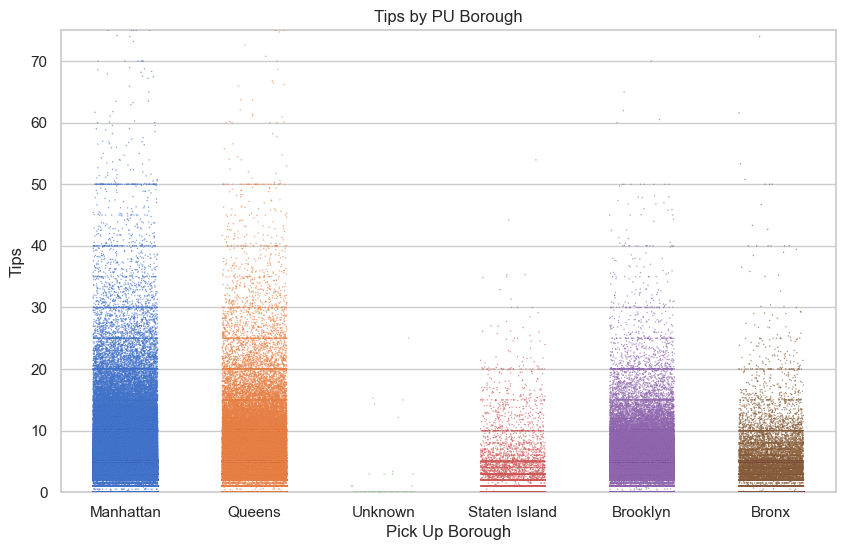

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='muted')

#sort by mean value
borough_medians = df.groupby('PU_Borough')['tips'].mean().sort_values(ascending=False)
sorted_boroughs = borough_medians.index.tolist()

plt.figure(figsize=(10, 6))
#boxplot = sns.boxplot(x='PU_Borough', y='tips', data=df, color='lightgray')
sns.stripplot(x='PU_Borough', y='tips', data=df, order=sorted_boroughs, jitter=0.25, size=1, edgecolor='gray', linewidth=0.005, alpha=0.7)
plt.title('Tips by PU Borough')
plt.xlabel('Pick Up Borough')
plt.ylabel('Tips')
plt.ylim(0, 75)
plt.show()


In [ ]:
trips.groupby(['DO_Borough'])['DO_Borough'].count().sort_values(ascending=False)

DO_Borough
Manhattan        794989
Brooklyn         532262
Queens           403245
Bronx            232524
Unknown           84636
Staten Island     27025
EWR               13367
Name: DO_Borough, dtype: int64

In [ ]:
trips.groupby(['DO_Borough'])['tips'].mean().sort_values(ascending=False)

DO_Borough
EWR              4.450534
Unknown          3.175034
Manhattan        1.167315
Queens           1.151026
Staten Island    0.834216
Brooklyn         0.774626
Bronx            0.332423
Name: tips, dtype: float64

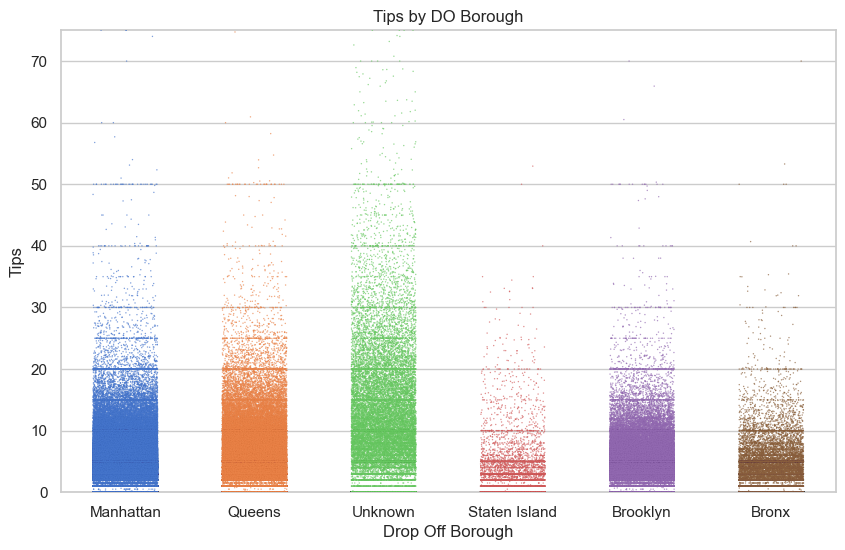

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='muted')

borough_medians = df.groupby('PU_Borough')['tips'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
#boxplot = sns.boxplot(x='PU_Borough', y='tips', data=df, color='lightgray')
sns.stripplot(x='DO_Borough', y='tips', data=df, order=sorted_boroughs, jitter=0.25, size=1, edgecolor='gray', linewidth=0.005, alpha=0.7)
plt.title('Tips by DO Borough')
plt.xlabel('Drop Off Borough')
plt.ylabel('Tips')
plt.ylim(0, 75)
plt.show()

In [ ]:
trips.groupby(['DO_Borough'])['tips'].sum().sort_values(ascending=False)

DO_Borough
Manhattan        928002.81
Queens           464145.28
Brooklyn         412303.89
Unknown          268722.21
Bronx             77296.31
EWR               59490.29
Staten Island     22544.70
Name: tips, dtype: float64

check unkonwn borough

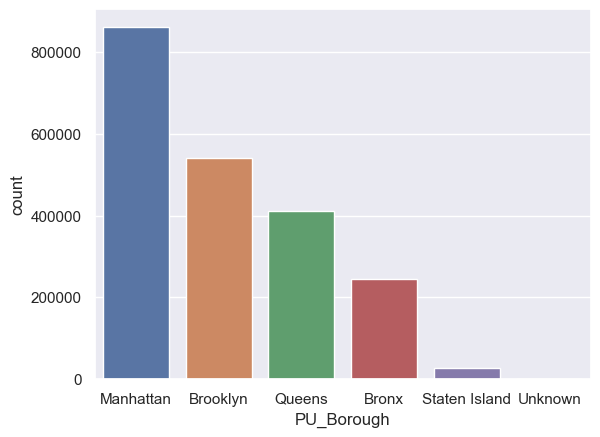

In [ ]:
sns.countplot(data=trips, x='PU_Borough', order=trips['PU_Borough'].value_counts().index)
plt.show()

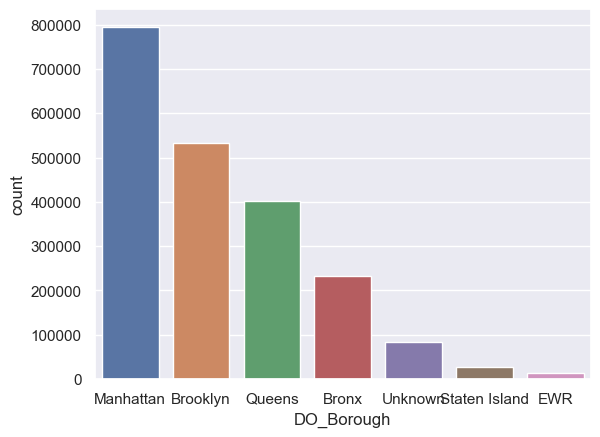

In [ ]:
sns.countplot(data=trips, x='DO_Borough', order=trips['DO_Borough'].value_counts().index)
plt.show()

In [ ]:
trips.dtypes

hvfhs_license_num               object
request_datetime        datetime64[ns]
pickup_datetime         datetime64[ns]
PULocationID                     int64
DOLocationID                     int64
trip_miles                     float64
base_passenger_fare            float64
tolls                          float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
shared_request_flag             object
shared_match_flag               object
wav_match_flag                  object
month                           object
PU_Borough                      object
DO_Borough                      object
PU_service_zone                 object
DO_service_zone                 object
pickup_day                       int64
period_of_day                   object
period_of_month                 object
pickup_hour                      int64
wait_time                      float64
dtype: object

In [ ]:
trips[(trips['PU_Borough'] == 'Unknown')].groupby(['PULocationID']).count()

,hvfhs_license_num,request_datetime,pickup_datetime,DOLocationID,trip_miles,base_passenger_fare,tolls,congestion_surcharge,airport_fee,tips,...,month,PU_Borough,DO_Borough,PU_service_zone,DO_service_zone,pickup_day,period_of_day,period_of_month,pickup_hour,wait_time
PULocationID,,,,,,,,,,,,,,,,,,,,,
265,101,101,101,101,101,101,101,101,101,101,...,101,101,101,59,59,101,101,101,101,101


In [ ]:
trips[(trips['DO_Borough'] == 'Unknown')].groupby(['DOLocationID']).count()

,hvfhs_license_num,request_datetime,pickup_datetime,PULocationID,trip_miles,base_passenger_fare,tolls,congestion_surcharge,airport_fee,tips,...,month,PU_Borough,DO_Borough,PU_service_zone,DO_service_zone,pickup_day,period_of_day,period_of_month,pickup_hour,wait_time
DOLocationID,,,,,,,,,,,,,,,,,,,,,
265,84636,84636,84636,84636,84636,84636,84636,84636,84636,84636,...,84636,84636,84636,0,0,84636,84636,84636,84636,84636


In [ ]:
trips[(trips['PULocationID'] == 264)].count()

hvfhs_license_num       0
request_datetime        0
pickup_datetime         0
PULocationID            0
DOLocationID            0
trip_miles              0
base_passenger_fare     0
tolls                   0
congestion_surcharge    0
airport_fee             0
tips                    0
shared_request_flag     0
shared_match_flag       0
wav_match_flag          0
month                   0
PU_Borough              0
DO_Borough              0
PU_service_zone         0
DO_service_zone         0
pickup_day              0
period_of_day           0
period_of_month         0
pickup_hour             0
wait_time               0
dtype: int64

In [ ]:
trips[(trips['DOLocationID'] == 264)].count()

hvfhs_license_num       0
request_datetime        0
pickup_datetime         0
PULocationID            0
DOLocationID            0
trip_miles              0
base_passenger_fare     0
tolls                   0
congestion_surcharge    0
airport_fee             0
tips                    0
shared_request_flag     0
shared_match_flag       0
wav_match_flag          0
month                   0
PU_Borough              0
DO_Borough              0
PU_service_zone         0
DO_service_zone         0
pickup_day              0
period_of_day           0
period_of_month         0
pickup_hour             0
wait_time               0
dtype: int64

In [ ]:
import pandas as pd

# Load CSV file into a Pandas dataframe
df = pd.read_csv('df.csv')

# Check the counts of unique values in the PU_service_zone column
print(df['PU_service_zone'].value_counts())

Boro Zone      1228948
Yellow Zone     678133
Airports         82964
EWR              13367
Name: PU_service_zone, dtype: int64


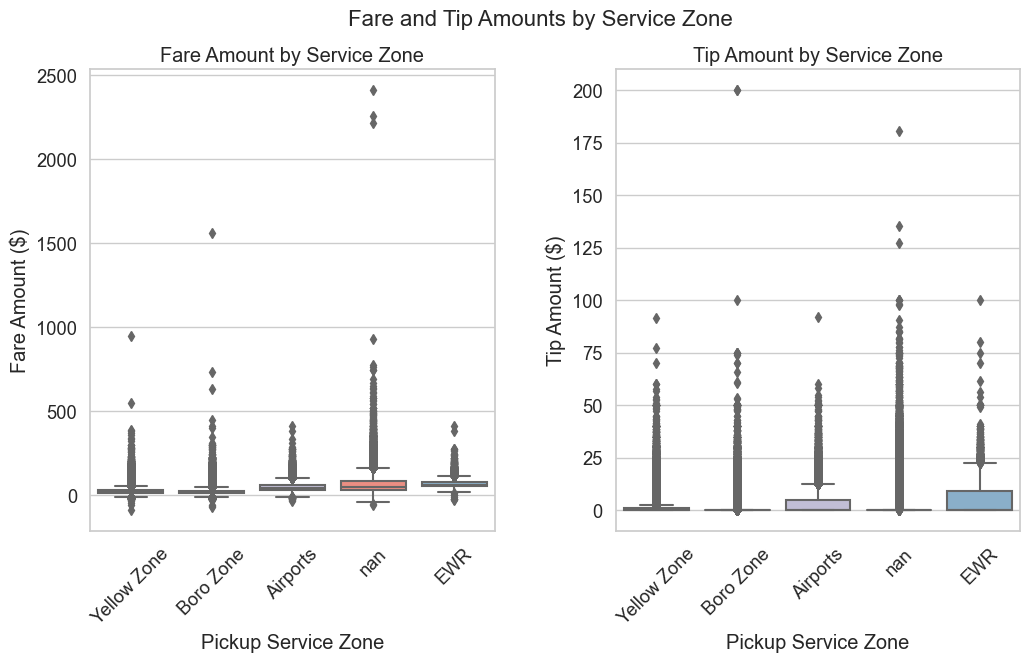

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert data types if needed
df['PU_service_zone'] = df['PU_service_zone'].astype(str)
df['base_passenger_fare'] = df['base_passenger_fare'].astype(float)
df['tips'] = df['tips'].astype(float)

# Set the style of the plot
sns.set(style='whitegrid', font_scale=1.2)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Create a boxplot of the fare amount by service zone
sns.boxplot(x='PU_service_zone', y='base_passenger_fare', data=df, palette='Set3', ax=ax1)
ax1.set_title('Fare Amount by Service Zone')
ax1.set_xlabel('Pickup Service Zone')
ax1.set_ylabel('Fare Amount ($)')
ax1.tick_params(axis='x', rotation=45)

# Create a boxplot of the tip amount by service zone
sns.boxplot(x='PU_service_zone', y='tips', data=df, palette='Set3', ax=ax2)
ax2.set_title('Tip Amount by Service Zone')
ax2.set_xlabel('Pickup Service Zone')
ax2.set_ylabel('Tip Amount ($)')
ax2.tick_params(axis='x', rotation=45)

# Add a title to the figure
fig.suptitle('Fare and Tip Amounts by Service Zone', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()


In [ ]:







....
some more visualization...

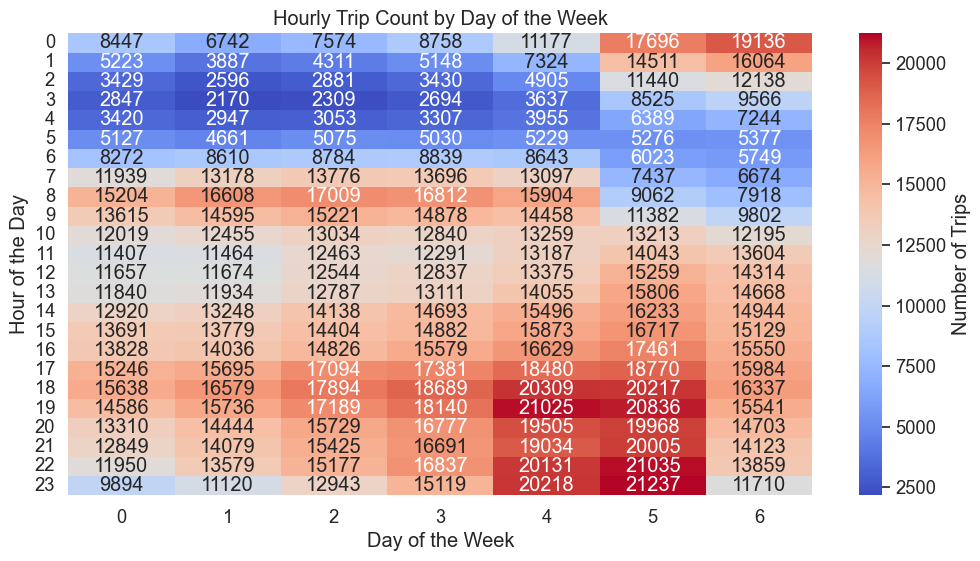

In [ ]:
#Heatmap of hourly trip count by day of the week:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert pickup datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Create a pivot table of hourly trip count by day of the week
hourly_trips = df.pivot_table(index=df['pickup_datetime'].dt.hour, 
                              columns=df['pickup_datetime'].dt.dayofweek, 
                              values='hvfhs_license_num', aggfunc='count')

# Set the style of the plot
sns.set(style='white', font_scale=1.2)

# Create a heatmap of hourly trip count by day of the week
plt.figure(figsize=(12,6))
sns.heatmap(hourly_trips, cmap='coolwarm', annot=True, fmt='g', cbar_kws={'label': 'Number of Trips'})
plt.title('Hourly Trip Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


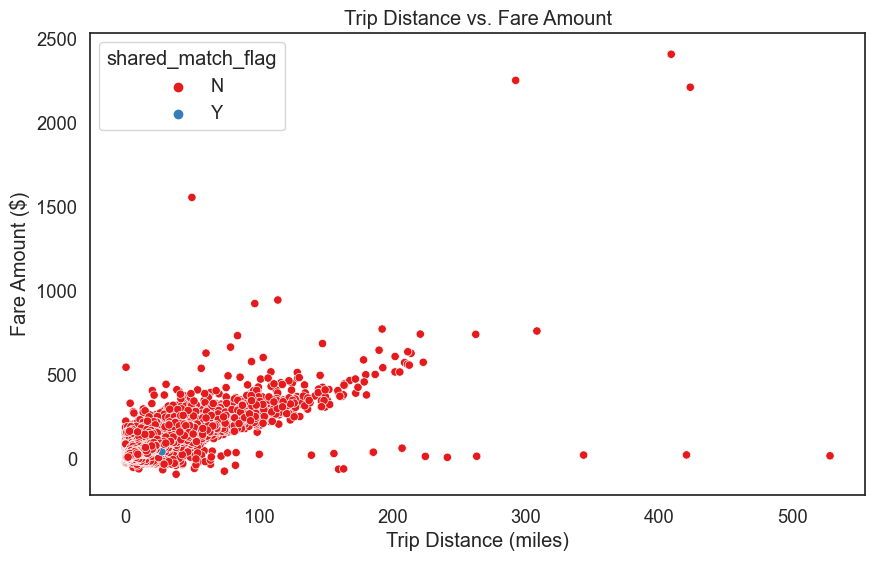

In [ ]:
#Scatter plot of trip distance vs. fare amount:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert data types if needed
df['trip_miles'] = df['trip_miles'].astype(float)
df['base_passenger_fare'] = df['base_passenger_fare'].astype(float)

# Set the style of the plot
sns.set(style='white', font_scale=1.2)

# Create a scatter plot of trip distance vs. fare amount
plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_miles', y='base_passenger_fare', data=df, hue='shared_match_flag', palette='Set1')
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

<Figure size 1000x600 with 0 Axes>

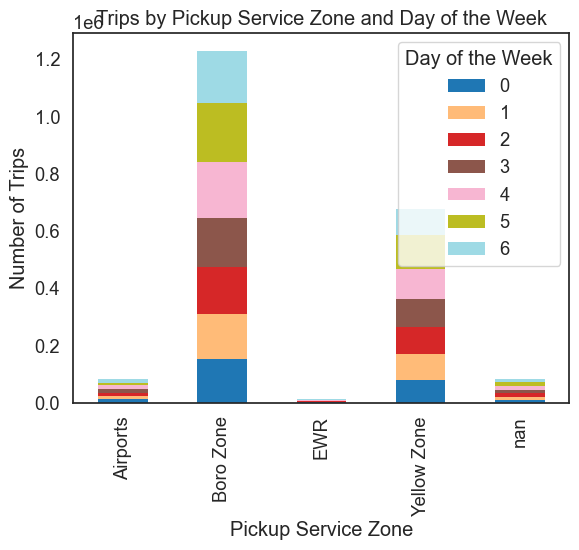

In [ ]:
#Stacked bar chart of trips by pickup service zone and day of the week:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert data types if needed
df['PU_service_zone'] = df['PU_service_zone'].astype(str)

# Create a pivot table of trip count by pickup service zone and day of the week
trips_by_zone = df.pivot_table(index='PU_service_zone', columns='pickup_day', values='hvfhs_license_num', aggfunc='count')

# Set the style of the plot
sns.set(style='white', font_scale=1.2)

# Create a stacked bar chart of trips by pickup service zone and day of the week
plt.figure(figsize=(10,6))
trips_by_zone.plot(kind='bar', stacked=True, cmap='tab20', edgecolor='none')
plt.title('Trips by Pickup Service Zone and Day of the Week')
plt.xlabel('Pickup Service Zone')
plt.ylabel('Number of Trips')
plt.legend(title='Day of the Week')
plt.show()

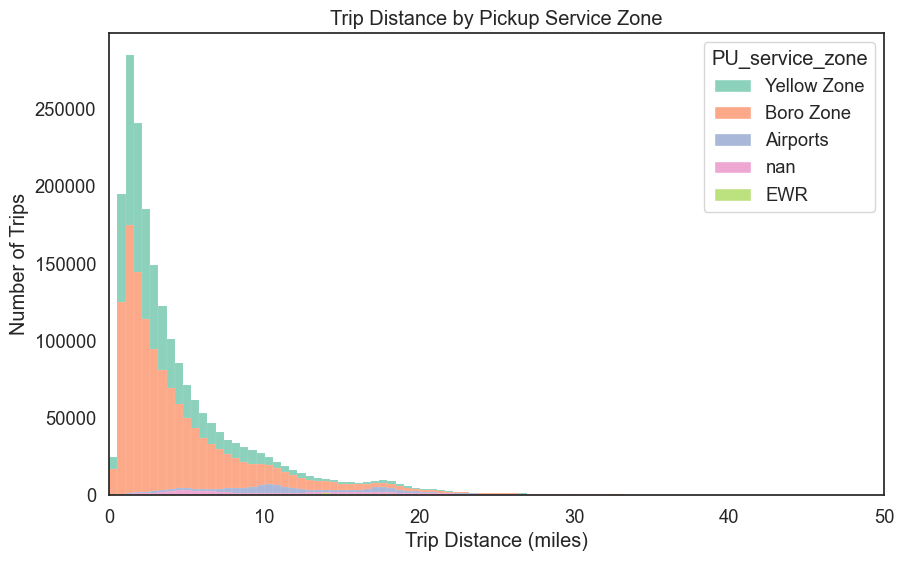

In [ ]:
#Histogram of trip distance by pickup service zone:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Convert data types if needed
df['PU_service_zone'] = df['PU_service_zone'].astype(str)
df['trip_miles'] = df['trip_miles'].astype(float)

#Set the style of the plot
sns.set(style='white', font_scale=1.2)

#Create a histogram of trip distance by pickup service zone
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='trip_miles', hue='PU_service_zone', multiple='stack', bins=1000, palette='Set2')
plt.title('Trip Distance by Pickup Service Zone')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Number of Trips')
plt.xlim(right=50)
plt.xlim(left=0)
plt.show()

In [ ]:
#Scatter plot of Pickup Datetime with Tip:

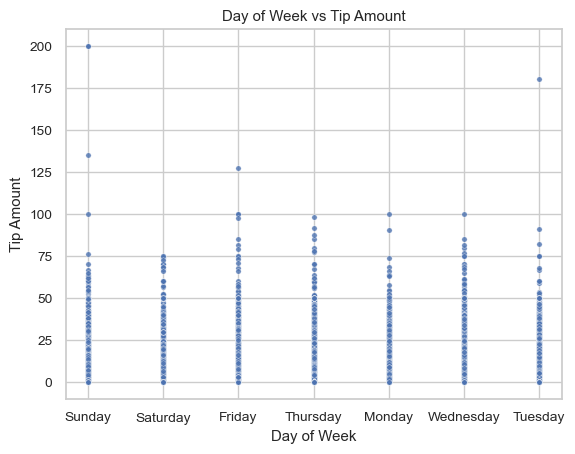

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV file into a Pandas dataframe
#df = pd.read_csv('df.csv')

# Convert data types if needed
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['tip_amount'] = df['tips'].astype(float)

# Set the style of the plot
sns.set(style='whitegrid', font_scale=0.9)

# Convert pickup_datetime to day of the week
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

# Create a scatter plot of day_of_week vs tip_amount
sns.scatterplot(x='day_of_week', y='tip_amount', data=df, alpha=0.8, s=15)
plt.xlabel('Day of Week')
plt.ylabel('Tip Amount')
plt.title('Day of Week vs Tip Amount')
plt.show()


In [ ]:
#Scatter plot of trip distance vs. fare amount:

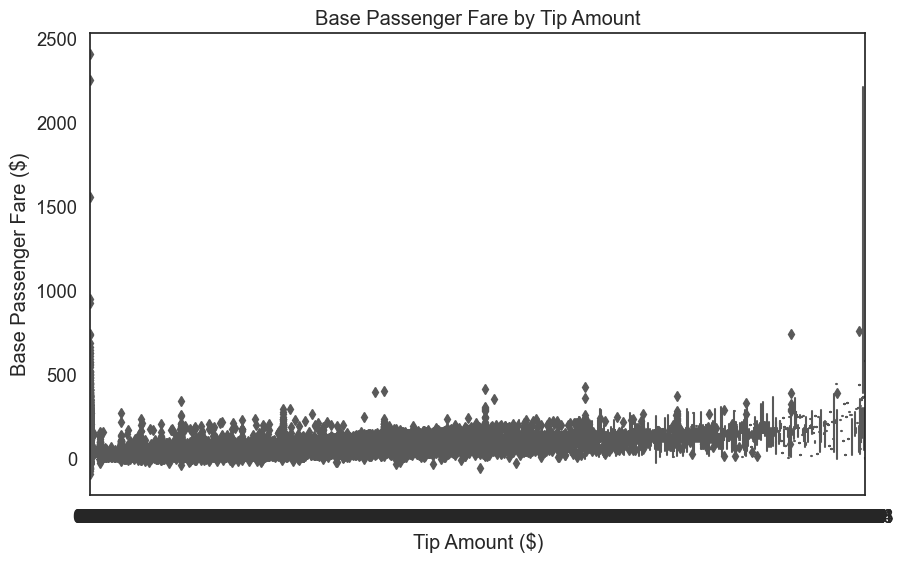

In [ ]:
# Convert data types if needed
df['base_passenger_fare'] = df['base_passenger_fare'].astype(float)
df['tip_amount'] = df['tip_amount'].astype(float)

# Set the style of the plot
sns.set(style='white', font_scale=1.2)

# Create a boxplot of base passenger fare by tip amount
plt.figure(figsize=(10,6))
sns.boxplot(x='tip_amount', y='base_passenger_fare', data=df, palette='Set2')
plt.title('Base Passenger Fare by Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Base Passenger Fare ($)')
plt.show()

In [ ]:
#Barplot of Shared_match_flag by tip_amount

C:\Users\shih_\AppData\Local\Temp\ipykernel_27412\2213103637.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('shared_match_flag').mean()['tips'].reset_index()


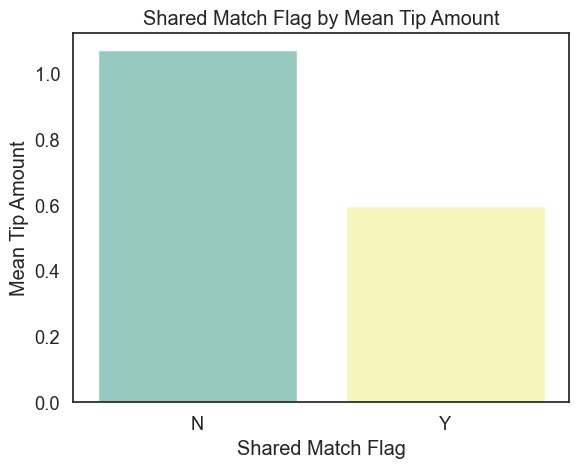

In [ ]:
# Group the data by Shared_match_flag and calculate the mean tip_amount for each group
df_grouped = df.groupby('shared_match_flag').mean()['tips'].reset_index()

# Create a barplot of Shared_match_flag by tip_amount
sns.barplot(x='shared_match_flag', y='tips', data=df_grouped, palette='Set3')
plt.xlabel('Shared Match Flag')
plt.ylabel('Mean Tip Amount')
plt.title('Shared Match Flag by Mean Tip Amount')
plt.show()

# Feature Selection

In [ ]:
df = df[['hvfhs_license_num', 'trip_miles', 'base_passenger_fare',
       'tolls', 'congestion_surcharge', 'airport_fee', 'tips',
       'shared_request_flag', 'shared_match_flag', 'wav_match_flag', 
       'PU_Borough', 'DO_Borough', 'PU_service_zone', 'DO_service_zone',
       'pickup_day', 'period_of_day', 'pickup_hour']]
df = df[['hvfhs_license_num', 'trip_miles', 'base_passenger_fare','tips',
       'shared_request_flag', 'shared_match_flag', 'wav_match_flag', 
       'PU_Borough', 'DO_Borough', 'PU_service_zone', 'DO_service_zone',
       'pickup_day', 'period_of_day', 'pickup_hour']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088048 entries, 0 to 2088047
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   hvfhs_license_num    object 
 1   trip_miles           float64
 2   base_passenger_fare  float64
 3   tips                 float64
 4   shared_request_flag  object 
 5   shared_match_flag    object 
 6   wav_match_flag       object 
 7   PU_Borough           object 
 8   DO_Borough           object 
 9   PU_service_zone      object 
 10  DO_service_zone      object 
 11  pickup_day           int64  
 12  period_of_day        object 
 13  pickup_hour          int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 223.0+ MB


In [ ]:
df.to_csv('df_v2.csv')

# Data Preparation For Modelling

In [ ]:
# data processing aligment
df_x = df.drop(['Unnamed: 0', 'tips'], axis=1)

#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_x["hvfhs_license_num"] = le.fit_transform(df_x["hvfhs_license_num"])
df_x["shared_request_flag"] = le.fit_transform(df_x["shared_request_flag"])
df_x["shared_match_flag"] = le.fit_transform(df_x["shared_match_flag"])
df_x["wav_match_flag"] = le.fit_transform(df_x["wav_match_flag"])
df_x["PU_Borough"] = le.fit_transform(df_x["PU_Borough"])
df_x["DO_Borough"] = le.fit_transform(df_x["DO_Borough"])
df_x["PU_service_zone"] = le.fit_transform(df_x["PU_service_zone"])
df_x["DO_service_zone"] = le.fit_transform(df_x["DO_service_zone"])
df_x["period_of_day"] = le.fit_transform(df_x["period_of_day"])

#one-hot encoding and scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(),['trip_miles', 'base_passenger_fare'], ),
    (OneHotEncoder(categories="auto",drop="first"),["hvfhs_license_num", "shared_request_flag","shared_match_flag","wav_match_flag","PU_Borough","DO_Borough","PU_service_zone","DO_service_zone","pickup_day","period_of_day","pickup_hour"], )
)

X = preprocess.fit_transform(df_x)
X.shape

In [ ]:
y = df['tips']

In [ ]:
#train/test split alignment
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

In [ ]:
# record your model & model performance
import numpy as np
import pandas as pd
results_df = pd.DataFrame(np.zeros(shape=(7,4)))
results_df.index=[1,2,3,4,5,6,7]
results_df.columns = ["r2","mae","mse","rmse"]
results_df.index.rename("Model",inplace=True)
results_df

,r2,mae,mse,rmse
Model,,,,
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0


# Predictive Modelling

# Regression

#### Simple linear, Ridge, Lasso completed

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('df_v2.csv')

In [ ]:
df.head()

In [ ]:
print(df.dtypes)

In [ ]:
df_num_columns = df.shape[1]
print(df_num_columns)

In [ ]:
df_x = df.drop(['Unnamed: 0', 'tips'], axis=1)

#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_x["hvfhs_license_num"] = le.fit_transform(df_x["hvfhs_license_num"])
df_x["shared_request_flag"] = le.fit_transform(df_x["shared_request_flag"])
df_x["shared_match_flag"] = le.fit_transform(df_x["shared_match_flag"])
df_x["wav_match_flag"] = le.fit_transform(df_x["wav_match_flag"])
df_x["PU_Borough"] = le.fit_transform(df_x["PU_Borough"])
df_x["DO_Borough"] = le.fit_transform(df_x["DO_Borough"])
df_x["PU_service_zone"] = le.fit_transform(df_x["PU_service_zone"])
df_x["DO_service_zone"] = le.fit_transform(df_x["DO_service_zone"])
df_x["period_of_day"] = le.fit_transform(df_x["period_of_day"])

#one-hot encoding and scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(),['trip_miles', 'base_passenger_fare'], ),
    (OneHotEncoder(categories="auto",drop="first"),["hvfhs_license_num", "shared_request_flag","shared_match_flag","wav_match_flag","PU_Borough","DO_Borough","PU_service_zone","DO_service_zone","pickup_day","period_of_day","pickup_hour"], )
)

X = preprocess.fit_transform(df_x)
feature_names = preprocess.named_transformers_['onehotencoder'].get_feature_names_out()
column_names = ['trip_miles', 'base_passenger_fare'] + list(feature_names)
X_df = pd.DataFrame(X.toarray(), columns=column_names)

print(X.shape)
print(X_df.shape)

(2088048, 57)
(2088048, 57)


In [ ]:
X_df.head()

In [ ]:
print(X_df.dtypes)

In [ ]:
X_df_num_columns = X_df.shape[1]
print(X_df_num_columns)

In [ ]:
y = df['tips']
print(y.shape)

(2088048,)


In [ ]:
#train/test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.3, random_state = 42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1461633, 57) (1461633,)
(626415, 57) (626415,)


In [ ]:
import numpy as np
import pandas as pd
results_df = pd.DataFrame(np.zeros(shape=(7,4)))
results_df.index=[1,2,3,4,5,6,7]
results_df.columns = ["r2","mae","mse","rmse"]
results_df.index.rename("Model",inplace=True)
results_df

,r2,mae,mse,rmse
Model,,,,
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0


## Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Create linear regression object
linear_regr = LinearRegression()

# Train the model using the training sets
linear_regr.fit(x_train, y_train)

# Make predictions using the testing set
linear_regr_pred = linear_regr.predict(x_test)

linear_regr_r2 = r2_score(y_test, linear_regr_pred)
linear_regr_mae = mean_absolute_error(y_test, linear_regr_pred)
linear_regr_mse = mean_squared_error(y_test, linear_regr_pred, squared=True)
linear_regr_rmse = mean_squared_error(y_test, linear_regr_pred,squared=False)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % linear_regr_r2)

# The mean absolute error
print("Mean absolute error: %.2f" % linear_regr_mae)

# The mean squared error
print("Mean squared error: %.2f" % linear_regr_mse)

# The Root mean squared error
print("Root mean squared error: %.2f" % linear_regr_rmse)

Coefficient of determination: 0.14
Mean absolute error: 1.63
Mean squared error: 7.87
Root mean squared error: 2.81


In [ ]:
results_df.loc[1,'model'] = 'linear regression'
results_df.loc[1,'r2'] = linear_regr_r2
results_df.loc[1,'mae'] = linear_regr_mae
results_df.loc[1,'mse'] = linear_regr_mse
results_df.loc[1,'rmse'] = linear_regr_rmse

results_df

,r2,mae,mse,rmse,model
Model,,,,,
1,0.140049,1.626252,7.872604,2.805816,linear regression
2,0.000000,0.000000,0.000000,0.000000,NaN
3,0.000000,0.000000,0.000000,0.000000,NaN
4,0.000000,0.000000,0.000000,0.000000,NaN
5,0.000000,0.000000,0.000000,0.000000,NaN
6,0.000000,0.000000,0.000000,0.000000,NaN
7,0.000000,0.000000,0.000000,0.000000,NaN


## Best Subset Selection

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Perform best subset selection by identifying the best model that contains a given number of predictors, 
# where best is quantified using RSS. We'll define a helper function to outputs the best set of variables for each model size.

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
# a helper function to outputs the best set of variables for each model size
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
# Returns a DataFrame containing the best model that we generated
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

In [ ]:
models_best
print(models_best.loc[2, "model"].summary())

# Show the best 19-variable model (there's actually only one)
print(getBest(19)["model"].summary())

print(models_best.loc[2, "model"].rsquared)

In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

## Forward Stepwise selection

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def forward_selection(X, y, model=LinearRegression()):
    """
    Forward selection feature selection.
    
    Parameters:
    X (pandas.DataFrame): Independent variables.
    y (pandas.Series): Dependent variable.
    model (sklearn estimator): Regression model to evaluate performance.
    
    Returns:
    selected (list): List of selected features.
    """
    # initialize an empty list to store selected features
    selected = []
    
    # define a list of candidate features
    candidates = X.columns.tolist()
    
    # loop until all features have been selected or model performance stops improving
    while candidates:
        # initialize a list to store candidate models and their scores
        scores = []
        
        # loop over each candidate feature
        for feature in candidates:
            # select the features we've already chosen and add the new feature
            features = selected + [feature]
            
            # fit the model using the selected features and calculate the score
            # score using the coefficient of determination of the prediction (R-square)
            score = model.fit(X[features], y).score(X[features], y)
            
            # store the score and candidate features in a tuple
            scores.append((score, feature))
        
        # select the candidate feature with the highest score
        best_score, best_feature = max(scores)
        
        # add the best feature to the selected list and remove it from the candidates list
        selected.append(best_feature)
        candidates.remove(best_feature)
        
        # stop if the model performance stops improving
        if len(selected) > 1 and best_score < scores[-2][0]:
            break
    
    return selected

In [ ]:
# select features using forward selection
selected_features = forward_selection(x_train, y_train)

# fit the model using the selected features and evaluate performance on the test set
model = LinearRegression().fit(x_train[selected_features], y_train)
test_score = model.score(x_test[selected_features], y_test)

print('Selected features:', selected_features)
print('Test score:', test_score)

## Backward

In [ ]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = x_train.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

In [ ]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = data[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

### Ridge Regression

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [ ]:
# cross-validation to select alpha
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

In [ ]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge_model = ridge.fit(x_train, y_train)
ridge_model_pred = ridge_model.predict(x_test)

In [ ]:
ridge_model_r2 = r2_score(y_test, ridge_model_pred)
ridge_model_mae = mean_absolute_error(y_test, ridge_model_pred)
ridge_model_mse = mean_squared_error(y_test, ridge_model_pred, squared=True)
ridge_model_rmse = mean_squared_error(y_test, ridge_model_pred,squared=False)


# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % ridge_model_r2)

# The mean absolute error
print("Mean absolute error: %.2f" % ridge_model_mae)

# The mean squared error
print("Mean squared error: %.2f" % ridge_model_mse)

# The Root mean squared error
print("Root mean squared error: %.2f" % ridge_model_rmse)

In [ ]:
results_df.loc[2,'model'] = 'ridge regression'
results_df.loc[2,'r2'] = ridge_model_r2
results_df.loc[2,'mae'] = ridge_model_mae
results_df.loc[2,'mse'] = ridge_model_mse
results_df.loc[2,'rmse'] = ridge_model_rmse

results_df

,r2,mae,mse,rmse,model
Model,,,,,
1,0.140049,1.626252,7.872604,2.805816,linear regression
2,0.140054,1.626178,7.872561,2.805808,ridge regression
3,0.000000,0.000000,0.000000,0.000000,NaN
4,0.000000,0.000000,0.000000,0.000000,NaN
5,0.000000,0.000000,0.000000,0.000000,NaN
6,0.000000,0.000000,0.000000,0.000000,NaN
7,0.000000,0.000000,0.000000,0.000000,NaN


### Lasso

In [ ]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000) 
lassocv.fit(x_train, y_train)

print("Best alpha for lasso:",lassocv.alpha_)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
mean_squared_error(y_test, lasso.predict(x_test))

In [ ]:
print("Best alpha for lasso:",lassocv.alpha_)

In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
lasso_model_pred = lasso.predict(x_test)

In [ ]:
lasso_model_r2 = r2_score(y_test, lasso_model_pred)
lasso_model_mae = mean_absolute_error(y_test, lasso_model_pred)
lasso_model_mse = mean_squared_error(y_test, lasso_model_pred, squared=True)
lasso_model_rmse = mean_squared_error(y_test, lasso_model_pred,squared=False)


# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % lasso_model_r2)

# The mean absolute error
print("Mean absolute error: %.2f" % lasso_model_mae)

# The mean squared error
print("Mean squared error: %.2f" % lasso_model_mse)

# The Root mean squared error
print("Root mean squared error: %.2f" % lasso_model_rmse)

In [ ]:
results_df.loc[3,'model'] = 'lasso_model'
results_df.loc[3,'r2'] = lasso_model_r2
results_df.loc[3,'mae'] = lasso_model_mae
results_df.loc[3,'mse'] = lasso_model_mse
results_df.loc[3,'rmse'] = lasso_model_rmse

results_df

,r2,mae,mse,rmse,model
Model,,,,,
1,0.140049,1.626252,7.872604,2.805816,linear regression
2,0.140054,1.626178,7.872561,2.805808,ridge regression
3,0.139863,1.625004,7.874306,2.806119,lasso_model
4,0.000000,0.000000,0.000000,0.000000,NaN
5,0.000000,0.000000,0.000000,0.000000,NaN
6,0.000000,0.000000,0.000000,0.000000,NaN
7,0.000000,0.000000,0.000000,0.000000,NaN


# Random Forest

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("df_v2.csv")

In [ ]:
df_x = df.drop(['Unnamed: 0', 'tips'], axis=1)

#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_x["hvfhs_license_num"] = le.fit_transform(df_x["hvfhs_license_num"])
df_x["shared_request_flag"] = le.fit_transform(df_x["shared_request_flag"])
df_x["shared_match_flag"] = le.fit_transform(df_x["shared_match_flag"])
df_x["wav_match_flag"] = le.fit_transform(df_x["wav_match_flag"])
df_x["PU_Borough"] = le.fit_transform(df_x["PU_Borough"])
df_x["DO_Borough"] = le.fit_transform(df_x["DO_Borough"])
df_x["PU_service_zone"] = le.fit_transform(df_x["PU_service_zone"])
df_x["DO_service_zone"] = le.fit_transform(df_x["DO_service_zone"])
df_x["period_of_day"] = le.fit_transform(df_x["period_of_day"])

#one-hot encoding and scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(),['trip_miles', 'base_passenger_fare'], ),
    (OneHotEncoder(categories="auto",drop="first"),["hvfhs_license_num", "shared_request_flag","shared_match_flag","wav_match_flag","PU_Borough","DO_Borough","PU_service_zone","DO_service_zone","pickup_day","period_of_day","pickup_hour"], )
)

X = preprocess.fit_transform(df_x)
X.shape

(2088048, 57)

In [ ]:
y = df['tips']

In [ ]:
#train/test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1461633, 57) (1461633,)
(626415, 57) (626415,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42,
                                 n_estimators=30,
                                 max_depth=6,
                                 min_samples_leaf=100,
                                 min_samples_split=300)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=100, min_samples_split=300,
                      n_estimators=30, random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


y_test_pred = rfr.predict(x_test)
y_train_pred = rfr.predict(x_train)

# Calculate R-squared score
r2 = r2_score(y_test, y_test_pred)
print('R-squared:', r2)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)
print('Mean absolute error:', mae)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean squared error:', mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print('Root mean squared error:', rmse)

R-squared: 0.1437210518119385
Mean absolute error: 1.616130927951324
Mean squared error: 7.838991164670061
Root mean squared error: 2.799819845038259


# XGBoost

In [ ]:
xgboost_values= {'r2': 0.1534037104860213, 'mae': 1.6002616418128641, 'mse': 7.7503491678566805, 'rmse': 2.7839448931070243}

# # xgb = XGBRegressor(n_estimators=500, 
#                    learning_rate=0.05, 
#                    min_child_weight=500, 
#                    max_depth=4)
# xgb.fit(x_train ,y_train)

# y_pred = xgb.predict(x_test)
# MAE: 1.6002616418128641
# MSE: 7.7503491678566805
# RMSE: 2.7839448931070243
# R-squared: 0.1534037104860213

# GBM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('df_v2.csv')

In [ ]:
# Selecting numerical columns
numerical_columns = ['trip_miles', 'base_passenger_fare']

# Encoding categorical columns (example with one-hot encoding)
categorical_columns = ['PU_Borough', 'DO_Borough', 'PU_service_zone', 'DO_service_zone', 'pickup_day', 'period_of_day', 'pickup_hour']
df_encoded = pd.get_dummies(df[categorical_columns])

# Concatenating numerical and encoded categorical columns
X = pd.concat([df[numerical_columns], df_encoded], axis=1)
y = df['tips']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = gbm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 7.782381617896041
R-squared: 0.14990469995629774


# Neural Networks

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/DROM Neural Network/df_v2.csv')

In [ ]:
df_x = df.drop(['Unnamed: 0', 'tips'], axis=1)

#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_x["hvfhs_license_num"] = le.fit_transform(df_x["hvfhs_license_num"])
df_x["shared_request_flag"] = le.fit_transform(df_x["shared_request_flag"])
df_x["shared_match_flag"] = le.fit_transform(df_x["shared_match_flag"])
df_x["wav_match_flag"] = le.fit_transform(df_x["wav_match_flag"])
df_x["PU_Borough"] = le.fit_transform(df_x["PU_Borough"])
df_x["DO_Borough"] = le.fit_transform(df_x["DO_Borough"])
df_x["PU_service_zone"] = le.fit_transform(df_x["PU_service_zone"])
df_x["DO_service_zone"] = le.fit_transform(df_x["DO_service_zone"])
df_x["period_of_day"] = le.fit_transform(df_x["period_of_day"])

#one-hot encoding and scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(),['trip_miles', 'base_passenger_fare'], ),
    (OneHotEncoder(categories="auto",drop="first"),["hvfhs_license_num", "shared_request_flag","shared_match_flag","wav_match_flag","PU_Borough","DO_Borough","PU_service_zone","DO_service_zone","pickup_day","period_of_day","pickup_hour"], )
)

X = preprocess.fit_transform(df_x)
X.shape

(2088048, 57)

In [ ]:
y = df['tips']

In [ ]:
from scipy.sparse import csr_matrix
import numpy as np
X_dense = X.toarray()

In [ ]:
#train/test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_dense, y, test_size = 0.3, random_state = 42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1461633, 57) (1461633,)
(626415, 57) (626415,)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
y_train

862199     1.0
550945     0.0
1546931    0.0
57968      8.0
1475570    1.0
          ... 
259178     0.0
1414414    0.0
131932     0.0
671155     0.0
121958     0.0
Name: tips, Length: 1461633, dtype: float64

In [ ]:
from keras.layers import Dropout
from keras.regularizers import l2

model_value = Sequential()
model_value.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
#model_value.add(Dropout(0.2))
model_value.add(Dense(128, activation='relu'))
#model_value.add(Dropout(0.2))
model_value.add(Dense(128, activation='relu'))
#model_value.add(Dropout(0.2))
#model_value.add(Dense(1, activation='linear', kernel_regularizer=l2(0.001)))
model_value.add(Dense(1, activation='linear'))
model_value.compile(loss='mean_squared_error', optimizer='adam')
model_value.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
22839/22839 [==============================] - 79s 3ms/step - loss: 7.8318 - val_loss: 7.7688
Epoch 2/50
22839/22839 [==============================] - 80s 4ms/step - loss: 7.7833 - val_loss: 7.7941
Epoch 3/50
22839/22839 [==============================] - 84s 4ms/step - loss: 7.7560 - val_loss: 7.7762
Epoch 4/50
22839/22839 [==============================] - 80s 4ms/step - loss: 7.7503 - val_loss: 7.7377
Epoch 5/50
22839/22839 [==============================] - 81s 4ms/step - loss: 7.7436 - val_loss: 7.7452
Epoch 6/50
22839/22839 [==============================] - 81s 4ms/step - loss: 7.7315 - val_loss: 7.7405
Epoch 7/50
22839/22839 [==============================] - 73s 3ms/step - loss: 7.7252 - val_loss: 7.7447
Epoch 8/50
22839/22839 [==============================] - 81s 4ms/step - loss: 7.7247 - val_loss: 7.7325
Epoch 9/50
22839/22839 [==============================] - 80s 4ms/step - loss: 7.7172 - val_loss: 7.7825
Epoch 10/50
22839/22839 [==============================

In [ ]:
model_value.save('model_value_v1.keras')

In [ ]:
y_pred = model_value.predict(x_test)

19576/19576 [==============================] - 36s 2ms/step
RMSE on test set: 2.79
R Squared on test set: 0.15


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
print("MAE on test set: {:.2f}".format(mae))
print("MSE on test set: {:.2f}".format(mse))
print("RMSE on test set: {:.2f}".format(rmse))
print("R Squared on test set: {:.2f}".format(r_squared))

MAE on test set: 1.61
MSE on test set: 7.78
RMSE on test set: 2.79
R Squared on test set: 0.15


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
print("MAE on test set: {}".format(mae))
print("MSE on test set: {}".format(mse))
print("RMSE on test set: {}".format(rmse))
print("R Squared on test set: {}".format(r_squared))

MAE on test set: 1.6096247676525526
MSE on test set: 7.777500056868535
RMSE on test set: 2.788816963672685
R Squared on test set: 0.1504379290229393


# Reporting Model Performances

In [ ]:
import numpy as np
import pandas as pd
results_df = pd.DataFrame(np.zeros(shape=(5,2)))
results_df.index=[1,2,3,4,5]
results_df.columns = ["rmse", "model name"]
results_df.index.rename("Model",inplace=True)

results_df['rmse'][1] = 2.805808
results_df['model name'][1] = 'Regression (Ridge)'
results_df['rmse'][2] = 2.79982
results_df['model name'][2] = 'Random Forest'
results_df['rmse'][3] = 2.7839448931070243
results_df['model name'][3] = 'XGBoost'
results_df['rmse'][4] = 2.7896920292204372
results_df['model name'][4] = 'GBM'
results_df['rmse'][5] = 2.788816963672685
results_df['model name'][5] = 'Neural Network'

In [ ]:
results_df

,rmse,model name
Model,,
1,2.805808,Regression (Ridge)
2,2.799820,Random Forest
3,2.783945,XGBoost
4,2.789692,GBM
5,2.788817,Neural Network
